#**Importing Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd

#**Loading the Birds Dataset**

There are many kinds of birds: pigeons, ducks, ostriches, penguins… Some are good at flying, others can't fly but run fast. Some swim under water, others wading in shallow pool.

According to their living environments and living habits, birds are classified into different ecological groups. There are 6 ecological groups of birds:

* Swimming Birds (SW)
* Wading Birds (W)
* Terrestrial Birds (T)
* Raptors (R)
* Scansorial Birds (P)
* Singing Birds (SO)

Apparently, birds belong to different ecological groups have different appearances: **flying birds have strong wings and wading birds have long legs**. Their living habits are somewhat reflected in their bones' shapes. As data scientists we may think of examining the underlying relationship between sizes of bones and ecological groups, and recognising birds' ecological groups by their bones' shapes.

**Content**

There are 420 birds contained in this dataset. Each bird is represented by 10 measurements (features):

* Length and Diameter of Humerus
* Length and Diameter of Ulna
* Length and Diameter of Femur
* Length and Diameter of Tibiotarsus
* Length and Diameter of Tarsometatarsus

In [3]:
bird_data = pd.read_csv('bird.csv', delimiter = ',')
bird_data.head(5)

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


#**Accessing the Column Names in the Dataset**

In [4]:
bird_data.columns

Index(['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw', 'type'],
      dtype='object')

In [5]:
bird_data = bird_data.set_index('id')
bird_data.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
id,,,,,,,,,,,
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


#**Finding the Shape of the Dataset**

In [6]:
bird_data.shape

(420, 11)

In [7]:
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    419 non-null    float64
 1   humw    419 non-null    float64
 2   ulnal   417 non-null    float64
 3   ulnaw   418 non-null    float64
 4   feml    418 non-null    float64
 5   femw    419 non-null    float64
 6   tibl    418 non-null    float64
 7   tibw    419 non-null    float64
 8   tarl    419 non-null    float64
 9   tarw    419 non-null    float64
 10  type    420 non-null    object 
dtypes: float64(10), object(1)
memory usage: 39.4+ KB


#**Checking Missing Values**

In [8]:
bird_data.isna().sum()

huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [9]:
bird_data.dropna(how='any', inplace=True)

In [10]:
bird_data.isna().sum()

huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [11]:
bird_data.shape

(413, 11)

# **Unique Values in the Data**

In [12]:
bird_data.nunique()

huml     403
humw     319
ulnal    394
ulnaw    305
feml     397
femw     287
tibl     401
tibw     283
tarl     403
tarw     277
type       6
dtype: int64

In [13]:
bird_data['type'].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

# **Label Encoding of Categorical Variables**

Label Encoding means converting categorical features into numerical values. So that they can be fitted by machine learning models which only take numerical data.

**Example:** 
Suppose we have a column Height in some dataset that has elements as Tall, Medium, and short. To convert this categorical column into a numerical column we will apply label encoding to this column. After applying label encoding, the Height column is converted into a numerical column having elements 0,1, and 2 where 0 is the label for tall, 1 is the label for medium, and 2 is the label for short height.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bird_data[['type']] = bird_data[['type']].apply(le.fit_transform)

In [15]:
bird_data.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
id,,,,,,,,,,,
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


#**Seperating Label from Data**

In [16]:
y = bird_data['type']
X = bird_data.drop(['type'],axis=1)

In [17]:
X.columns

Index(['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw'],
      dtype='object')

In [18]:
y

id
0      3
1      3
2      3
3      3
4      3
      ..
415    2
416    2
417    2
418    2
419    2
Name: type, Length: 413, dtype: int32

In [19]:
y.shape

(413,)

#**One-Hot-Encoding**

* It allows the use of categorical variables in models that require numerical input.
* It can improve model performance by providing more information to the model about the categorical variable.
* It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).

In [20]:
from keras.utils import np_utils
num_classes = 6
y = np_utils.to_categorical(y, num_classes)
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

#**Splitting the Data into Training and Testing**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [22]:
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (330, 10)
Shape of the X_test (83, 10)
Shape of the y_train (330, 6)
Shape of the y_test (83, 6)


# **Feature Scaling:**
The result of **standardization** (or **Z-Score normalization**) is that the features will be re scaled so that they'll have the properties of a standard normal distribution with: 
$$\mu = 0$$
And
$$\sigma = 1$$

Where $\mu$ is the mean(average) and $\sigma$ is the standard deviation from the mean; standard scores (also called **Z** scores) of the sampels are calculated as follows: 
$$z = \frac{x - \mu}{\sigma}$$

***

# **About Min-Max Scaling**

An alternative approach to **Z-Score** normalization (or called standardization) is the so-called **Min-Max Scaling** (often also simply called **Normalization** - a common cause for ambiguities)

In this approach, the data is scaled to a fixed range - usually `[0, 1]`. 
The cost of having this bounded range - in contrast to standrdization - is that we will end up with smaaller standard deviations, which can suppress the effect of outliers. 

**Note**:

If the dataset have lot's of outliers, and the algorithms are sensitive to outliers, please use `Min-Max Scaler`

A `Min-Max Scaling` is typically done via the foloowing equation: 

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset. 


# **Z-Score Standardization or Min-Max Scaling**

"Standardization or Min-Max scaling"? - There is no obvious answer to this question: it really depends on the application. 

However this doesn't mean that `Min-Max Scaling` is not useful at all, A popular application is `image processing`, where pixel intensities have to be normalized to fit withint a certain range (i.e., `[0, 255]` for the RGB colour range). Also, typical _Neural Network_ Algorithm require data that on a `0 - 1` scale. 

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Building the ANN Model**

In [24]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [25]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

# **Compiling and Fitting the Model**

In [26]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 16, epochs = 800, verbose = 1)

Epoch 1/800
21/21 [==============================] - 1s 2ms/step - loss: 1.7872 - accuracy: 0.3152
Epoch 2/800
21/21 [==============================] - 0s 1ms/step - loss: 1.7718 - accuracy: 0.3697
Epoch 3/800
21/21 [==============================] - 0s 2ms/step - loss: 1.7257 - accuracy: 0.4848
Epoch 4/800
21/21 [==============================] - 0s 2ms/step - loss: 1.6189 - accuracy: 0.4970
Epoch 5/800
21/21 [==============================] - 0s 2ms/step - loss: 1.4867 - accuracy: 0.4970
Epoch 6/800
21/21 [==============================] - 0s 2ms/step - loss: 1.3966 - accuracy: 0.5030
Epoch 7/800
21/21 [==============================] - 0s 2ms/step - loss: 1.3419 - accuracy: 0.5030
Epoch 8/800
21/21 [==============================] - 0s 1ms/step - loss: 1.3053 - accuracy: 0.5091
Epoch 9/800
21/21 [==============================] - 0s 1ms/step - loss: 1.2820 - accuracy: 0.5121
Epoch 10/800
21/21 [==============================] - 0s 1ms/step - loss: 1.2694 - accuracy: 0.5091
Epoch 11/

21/21 [==============================] - 0s 2ms/step - loss: 0.7528 - accuracy: 0.7152
Epoch 83/800
21/21 [==============================] - 0s 2ms/step - loss: 0.7479 - accuracy: 0.7152
Epoch 84/800
21/21 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.7333
Epoch 85/800
21/21 [==============================] - 0s 2ms/step - loss: 0.7368 - accuracy: 0.7182
Epoch 86/800
21/21 [==============================] - 0s 1ms/step - loss: 0.7367 - accuracy: 0.7303
Epoch 87/800
21/21 [==============================] - 0s 742us/step - loss: 0.7303 - accuracy: 0.7152
Epoch 88/800
21/21 [==============================] - 0s 820us/step - loss: 0.7323 - accuracy: 0.7152
Epoch 89/800
21/21 [==============================] - 0s 1ms/step - loss: 0.7221 - accuracy: 0.7273
Epoch 90/800
21/21 [==============================] - 0s 820us/step - loss: 0.7186 - accuracy: 0.7273
Epoch 91/800
21/21 [==============================] - 0s 833us/step - loss: 0.7202 - accuracy: 0.7242
Epoch

21/21 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.7667
Epoch 163/800
21/21 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7788
Epoch 164/800
21/21 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.7848
Epoch 165/800
21/21 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7667
Epoch 166/800
21/21 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7848
Epoch 167/800
21/21 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7818
Epoch 168/800
21/21 [==============================] - 0s 602us/step - loss: 0.5723 - accuracy: 0.7788
Epoch 169/800
21/21 [==============================] - 0s 966us/step - loss: 0.5774 - accuracy: 0.7758
Epoch 170/800
21/21 [==============================] - 0s 785us/step - loss: 0.5885 - accuracy: 0.7667
Epoch 171/800
21/21 [==============================] - 0s 962us/step - loss: 0.5798 - accuracy: 0.7

21/21 [==============================] - 0s 871us/step - loss: 0.5033 - accuracy: 0.8030
Epoch 243/800
21/21 [==============================] - 0s 911us/step - loss: 0.4926 - accuracy: 0.8091
Epoch 244/800
21/21 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.8061
Epoch 245/800
21/21 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.8030
Epoch 246/800
21/21 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7818
Epoch 247/800
21/21 [==============================] - 0s 735us/step - loss: 0.4880 - accuracy: 0.8212
Epoch 248/800
21/21 [==============================] - 0s 928us/step - loss: 0.4948 - accuracy: 0.8091
Epoch 249/800
21/21 [==============================] - 0s 999us/step - loss: 0.4935 - accuracy: 0.8000
Epoch 250/800
21/21 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.8091
Epoch 251/800
21/21 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0

21/21 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8333
Epoch 323/800
21/21 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8394
Epoch 324/800
21/21 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8424
Epoch 325/800
21/21 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8545
Epoch 326/800
21/21 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8545
Epoch 327/800
21/21 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8576
Epoch 328/800
21/21 [==============================] - 0s 901us/step - loss: 0.4216 - accuracy: 0.8606
Epoch 329/800
21/21 [==============================] - 0s 956us/step - loss: 0.4288 - accuracy: 0.8515
Epoch 330/800
21/21 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8545
Epoch 331/800
21/21 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8576


Epoch 403/800
21/21 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8727
Epoch 404/800
21/21 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8788
Epoch 405/800
21/21 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8788
Epoch 406/800
21/21 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8818
Epoch 407/800
21/21 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8788
Epoch 408/800
21/21 [==============================] - 0s 759us/step - loss: 0.3629 - accuracy: 0.8727
Epoch 409/800
21/21 [==============================] - 0s 876us/step - loss: 0.3668 - accuracy: 0.8788
Epoch 410/800
21/21 [==============================] - 0s 940us/step - loss: 0.3647 - accuracy: 0.8727
Epoch 411/800
21/21 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8788
Epoch 412/800
21/21 [==============================] - 0s 2ms/step - loss: 0.3552 - a

21/21 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8879
Epoch 484/800
21/21 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8909
Epoch 485/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8970
Epoch 486/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8939
Epoch 487/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8970
Epoch 488/800
21/21 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.8939
Epoch 489/800
21/21 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.8970
Epoch 490/800
21/21 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8939
Epoch 491/800
21/21 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.8879
Epoch 492/800
21/21 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8909
Epoc

21/21 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9394
Epoch 565/800
21/21 [==============================] - 0s 1ms/step - loss: 0.2402 - accuracy: 0.9273
Epoch 566/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9212
Epoch 567/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9212
Epoch 568/800
21/21 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9273
Epoch 569/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9242
Epoch 570/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.9182
Epoch 571/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.9000
Epoch 572/800
21/21 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8939
Epoch 573/800
21/21 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.9212
Epoc

21/21 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9364
Epoch 646/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9394
Epoch 647/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9303
Epoch 648/800
21/21 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9333
Epoch 649/800
21/21 [==============================] - 0s 975us/step - loss: 0.2027 - accuracy: 0.9364
Epoch 650/800
21/21 [==============================] - 0s 833us/step - loss: 0.1961 - accuracy: 0.9394
Epoch 651/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9394
Epoch 652/800
21/21 [==============================] - 0s 1ms/step - loss: 0.1955 - accuracy: 0.9394
Epoch 653/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9364
Epoch 654/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9394


21/21 [==============================] - 0s 1ms/step - loss: 0.1836 - accuracy: 0.9333
Epoch 727/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9394
Epoch 728/800
21/21 [==============================] - 0s 1ms/step - loss: 0.1754 - accuracy: 0.9364
Epoch 729/800
21/21 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9394
Epoch 730/800
21/21 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9333
Epoch 731/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9394
Epoch 732/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9333
Epoch 733/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9394
Epoch 734/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9394
Epoch 735/800
21/21 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9424
Epoc

#**Testing the Model**

In [27]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

33/33 [==============================] - 0s 1ms/step - loss: 0.1525 - accuracy: 0.9455
Train score: 0.15252813696861267
Train accuracy: 0.9454545378684998
********************
9/9 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.9157
Test score: 0.2990904450416565
Test accuracy: 0.9156626462936401


#**Confusion Matrix**

### * **Accuracy** 
number of examples correctly predicted / total number of examples  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [28]:
# Predicting the Test set results
pred = classifier.predict(X_test)
print("Y_pred:", pred)
print("*****************")
y_pred = np.argmax(pred, axis = 1)
print("Y_pred:", y_pred)
print("*****************")
print("Y_test:", y_test)
y_true = np.argmax(y_test, axis = 1)
print("*****************")
print("Y_test:", y_true)

Y_pred: [[1.35476103e-05 5.10242514e-18 9.99983430e-01 2.95880909e-06
  5.51035555e-08 5.98014097e-13]
 [5.58493985e-03 8.61416221e-01 2.10644640e-16 3.12802568e-02
  6.39130440e-06 1.01712249e-01]
 [4.70676720e-02 6.50461810e-03 7.37864383e-08 2.08471087e-04
  9.36989784e-01 9.22936946e-03]
 [8.50706577e-01 1.40902535e-13 5.90331703e-02 1.92702981e-03
  8.83199573e-02 1.32042087e-05]
 [2.72087277e-07 1.20019791e-07 0.00000000e+00 7.24172220e-02
  0.00000000e+00 9.27582383e-01]
 [6.49797443e-08 4.56213777e-35 3.60476506e-35 9.52364981e-01
  4.08454304e-22 4.76348698e-02]
 [3.15584660e-01 6.07466817e-01 6.93084449e-02 4.91763093e-03
  2.71017640e-03 1.22851870e-05]
 [7.53296819e-03 1.81346875e-24 9.15445562e-13 1.22439060e-02
  5.52960773e-06 9.80217576e-01]
 [1.29477590e-01 7.97507048e-01 6.04209155e-02 1.04229301e-02
  2.15068110e-03 2.08709625e-05]
 [1.70268363e-03 8.91906023e-01 4.14395575e-22 1.51756806e-02
  1.25729231e-08 9.12156999e-02]
 [1.11730025e-09 1.41203773e-18 9.99999881

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
target_names = ['P', 'R', 'SO', 'SW', 'T', 'W']

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 15.0, 'Predicted label')

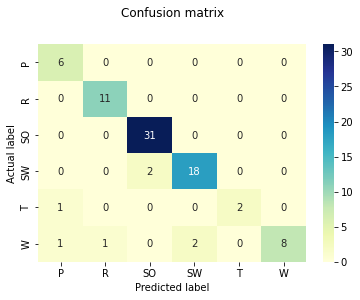

In [31]:
p = sns.heatmap(pd.DataFrame(cm), annot=True,xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Classification Report**
#**Classification Report**

### * **True Positive Rate**
number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  
Also called **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


### * **Positive Predictive Value**
number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

### * **F1 score**
Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [32]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred, target_names = target_names))

              precision    recall  f1-score   support

           P       0.75      1.00      0.86         6
           R       0.92      1.00      0.96        11
          SO       0.94      1.00      0.97        31
          SW       0.90      0.90      0.90        20
           T       1.00      0.67      0.80         3
           W       1.00      0.67      0.80        12

    accuracy                           0.92        83
   macro avg       0.92      0.87      0.88        83
weighted avg       0.92      0.92      0.91        83



#**ROC curve**

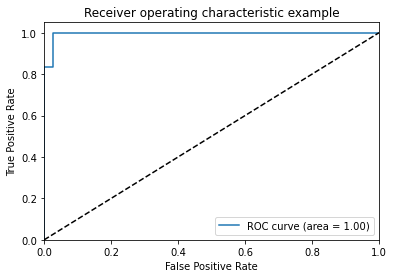

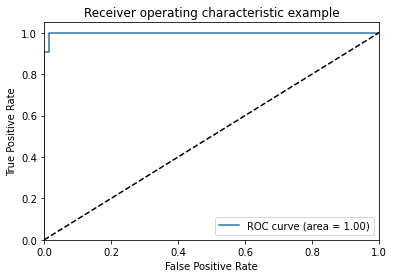

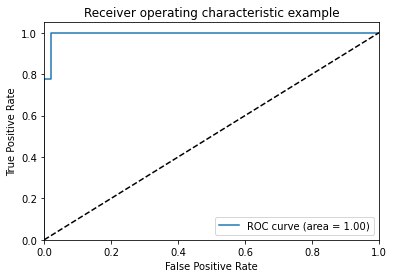

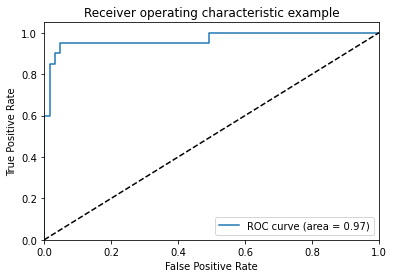

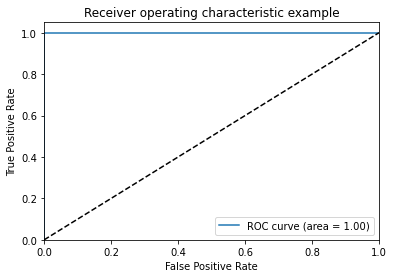

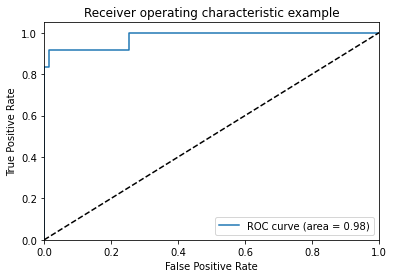

In [33]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(6):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

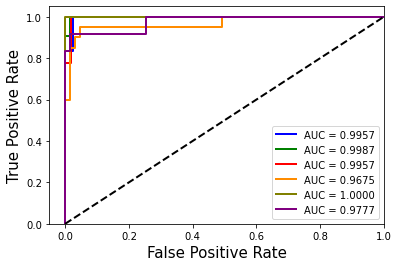

In [34]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors =cycle(['blue', 'green', 'red','darkorange','olive','purple'])
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='AUC = {1:0.4f}'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# **Finetuing the Network**

In [ ]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [16, 32],
              'epochs': [800, 1000],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train,verbose = 1)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/800


C:\Users\Rakesh\AppData\Local\Temp/ipykernel_42604/1183103113.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


19/19 [==============================] - 0s 2ms/step - loss: 1.7878 - accuracy: 0.2862
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7769 - accuracy: 0.2963
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7561 - accuracy: 0.2963
Epoch 4/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7100 - accuracy: 0.2963
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6280 - accuracy: 0.2963
Epoch 6/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5479 - accuracy: 0.4579
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4715 - accuracy: 0.5118
Epoch 8/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3961 - accuracy: 0.5118
Epoch 9/800
19/19 [==============================] - 0s 1ms/step - loss: 1.3432 - accuracy: 0.5152
Epoch 10/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3075 - accuracy: 0.5152
Epoch 11/800
19/19 [=

19/19 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.7239
Epoch 83/800
19/19 [==============================] - 0s 867us/step - loss: 0.6774 - accuracy: 0.7239
Epoch 84/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.7340
Epoch 85/800
19/19 [==============================] - 0s 953us/step - loss: 0.6748 - accuracy: 0.7205
Epoch 86/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.7374
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.7374
Epoch 88/800
19/19 [==============================] - 0s 771us/step - loss: 0.6652 - accuracy: 0.7340
Epoch 89/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.7340
Epoch 90/800
19/19 [==============================] - 0s 931us/step - loss: 0.6642 - accuracy: 0.7407
Epoch 91/800
19/19 [==============================] - 0s 992us/step - loss: 0.6614 - accuracy: 0.7340
Epo

19/19 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7946
Epoch 163/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5615 - accuracy: 0.8114
Epoch 164/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5602 - accuracy: 0.7946
Epoch 165/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.8081
Epoch 166/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.8081
Epoch 167/800
19/19 [==============================] - 0s 973us/step - loss: 0.5529 - accuracy: 0.8182
Epoch 168/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.8148
Epoch 169/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.8081
Epoch 170/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.8047
Epoch 171/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.8047
Ep

19/19 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.8485
Epoch 243/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8552
Epoch 244/800
19/19 [==============================] - 0s 843us/step - loss: 0.4499 - accuracy: 0.8620
Epoch 245/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8620
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8418
Epoch 247/800
19/19 [==============================] - 0s 824us/step - loss: 0.4365 - accuracy: 0.8552
Epoch 248/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8620
Epoch 249/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8586
Epoch 250/800
19/19 [==============================] - 0s 818us/step - loss: 0.4260 - accuracy: 0.8687
Epoch 251/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.851

19/19 [==============================] - 0s 914us/step - loss: 0.3315 - accuracy: 0.8923
Epoch 323/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8754
Epoch 324/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8923
Epoch 325/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8788
Epoch 326/800
19/19 [==============================] - 0s 711us/step - loss: 0.3251 - accuracy: 0.8788
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8822
Epoch 328/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8754
Epoch 329/800
19/19 [==============================] - 0s 887us/step - loss: 0.3355 - accuracy: 0.8721
Epoch 330/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8923
Epoch 331/800
19/19 [==============================] - 0s 944us/step - loss: 0.3288 - accuracy: 0.8

19/19 [==============================] - 0s 894us/step - loss: 0.2639 - accuracy: 0.9057
Epoch 403/800
19/19 [==============================] - 0s 969us/step - loss: 0.2643 - accuracy: 0.8923
Epoch 404/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8956
Epoch 405/800
19/19 [==============================] - 0s 891us/step - loss: 0.2618 - accuracy: 0.8822
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9057
Epoch 407/800
19/19 [==============================] - 0s 937us/step - loss: 0.2607 - accuracy: 0.8923
Epoch 408/800
19/19 [==============================] - 0s 987us/step - loss: 0.2596 - accuracy: 0.8923
Epoch 409/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8923
Epoch 410/800
19/19 [==============================] - 0s 893us/step - loss: 0.2652 - accuracy: 0.8788
Epoch 411/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy:

19/19 [==============================] - 0s 1ms/step - loss: 0.2437 - accuracy: 0.9024
Epoch 483/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.9091
Epoch 484/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9158
Epoch 485/800
19/19 [==============================] - 0s 862us/step - loss: 0.2248 - accuracy: 0.9158
Epoch 486/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9158
Epoch 487/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9158
Epoch 488/800
19/19 [==============================] - 0s 833us/step - loss: 0.2230 - accuracy: 0.9158
Epoch 489/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9192
Epoch 490/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9057
Epoch 491/800
19/19 [==============================] - 0s 931us/step - loss: 0.2168 - accuracy: 0.922

19/19 [==============================] - 0s 2ms/step - loss: 0.1837 - accuracy: 0.9394
Epoch 563/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.9495
Epoch 564/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9394
Epoch 565/800
19/19 [==============================] - 0s 759us/step - loss: 0.1810 - accuracy: 0.9495
Epoch 566/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9461
Epoch 567/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9428
Epoch 568/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1873 - accuracy: 0.9394
Epoch 569/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 0.9495
Epoch 570/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9461
Epoch 571/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9394
Ep

19/19 [==============================] - 0s 1ms/step - loss: 0.1543 - accuracy: 0.9630
Epoch 644/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9596
Epoch 645/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9630
Epoch 646/800
19/19 [==============================] - 0s 911us/step - loss: 0.1523 - accuracy: 0.9596
Epoch 647/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9562
Epoch 648/800
19/19 [==============================] - 0s 865us/step - loss: 0.1541 - accuracy: 0.9562
Epoch 649/800
19/19 [==============================] - 0s 951us/step - loss: 0.1588 - accuracy: 0.9394
Epoch 650/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9663
Epoch 651/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9529
Epoch 652/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1554 - accuracy: 0.959

19/19 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9663
Epoch 724/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 0.9596
Epoch 725/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9529
Epoch 726/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9562
Epoch 727/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9697
Epoch 728/800
19/19 [==============================] - 0s 973us/step - loss: 0.1294 - accuracy: 0.9663
Epoch 729/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9596
Epoch 730/800
19/19 [==============================] - 0s 830us/step - loss: 0.1284 - accuracy: 0.9663
Epoch 731/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9663
Epoch 732/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9630


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 0s 2ms/step - loss: 1.7878 - accuracy: 0.2896
Epoch 2/800
19/19 [==============================] - 0s 505us/step - loss: 1.7770 - accuracy: 0.3434
Epoch 3/800
19/19 [==============================] - 0s 922us/step - loss: 1.7564 - accuracy: 0.2929
Epoch 4/800
19/19 [==============================] - 0s 988us/step - loss: 1.7155 - accuracy: 0.2929
Epoch 5/800
19/19 [==============================] - 0s 1ms/step - loss: 1.6488 - accuracy: 0.2929
Epoch 6/800
19/19 [==============================] - 0s 850us/step - loss: 1.6129 - accuracy: 0.3165
Epoch 7/800
19/19 [==============================] - 0s 1ms/step - loss: 1.5906 - accuracy: 0.2862
Epoch 8/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5696 - accuracy: 0.2862
Epoch 9/800
19/19 [==============================] - 0s 941us/step - loss: 1.5455 - accuracy: 0.2862
Epoch 10/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5125 - accuracy: 0.3906
Epoch 11/80

19/19 [==============================] - 0s 934us/step - loss: 0.7156 - accuracy: 0.7138
Epoch 83/800
19/19 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.7172
Epoch 84/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.7172
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.7172
Epoch 86/800
19/19 [==============================] - 0s 865us/step - loss: 0.7056 - accuracy: 0.7172
Epoch 87/800
19/19 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.7239
Epoch 88/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.7205
Epoch 89/800
19/19 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.7205
Epoch 90/800
19/19 [==============================] - 0s 907us/step - loss: 0.7044 - accuracy: 0.7172
Epoch 91/800
19/19 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.7306
Epoch 9

19/19 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7609
Epoch 163/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5898 - accuracy: 0.7744
Epoch 164/800
19/19 [==============================] - 0s 836us/step - loss: 0.5935 - accuracy: 0.7576
Epoch 165/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7677
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7609
Epoch 167/800
19/19 [==============================] - 0s 904us/step - loss: 0.5881 - accuracy: 0.7811
Epoch 168/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7643
Epoch 169/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.7710
Epoch 170/800
19/19 [==============================] - 0s 841us/step - loss: 0.5865 - accuracy: 0.7744
Epoch 171/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.757

Epoch 243/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7879
Epoch 244/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.8047
Epoch 245/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7845
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7879
Epoch 247/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7980
Epoch 248/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7879
Epoch 249/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7912
Epoch 250/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7980
Epoch 251/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7912
Epoch 252/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5140 - accurac

19/19 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.8148
Epoch 324/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.8148
Epoch 325/800
19/19 [==============================] - 0s 959us/step - loss: 0.4673 - accuracy: 0.8114
Epoch 326/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8114
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8148
Epoch 328/800
19/19 [==============================] - 0s 890us/step - loss: 0.4646 - accuracy: 0.8215
Epoch 329/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.8148
Epoch 330/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8148
Epoch 331/800
19/19 [==============================] - 0s 944us/step - loss: 0.4631 - accuracy: 0.8148
Epoch 332/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.814

19/19 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8451
Epoch 404/800
19/19 [==============================] - 0s 945us/step - loss: 0.4167 - accuracy: 0.8485
Epoch 405/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8586
Epoch 406/800
19/19 [==============================] - 0s 891us/step - loss: 0.4195 - accuracy: 0.8350
Epoch 407/800
19/19 [==============================] - 0s 990us/step - loss: 0.4201 - accuracy: 0.8519
Epoch 408/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8552
Epoch 409/800
19/19 [==============================] - 0s 793us/step - loss: 0.4147 - accuracy: 0.8519
Epoch 410/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8586
Epoch 411/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8586
Epoch 412/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8

19/19 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8788
Epoch 484/800
19/19 [==============================] - 0s 911us/step - loss: 0.3378 - accuracy: 0.8721
Epoch 485/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8754
Epoch 486/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8754
Epoch 487/800
19/19 [==============================] - 0s 960us/step - loss: 0.3378 - accuracy: 0.8788
Epoch 488/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8721
Epoch 489/800
19/19 [==============================] - 0s 794us/step - loss: 0.3400 - accuracy: 0.8855
Epoch 490/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8822
Epoch 491/800
19/19 [==============================] - 0s 913us/step - loss: 0.3376 - accuracy: 0.8822
Epoch 492/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8

19/19 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8923
Epoch 565/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8923
Epoch 566/800
19/19 [==============================] - 0s 793us/step - loss: 0.3001 - accuracy: 0.8990
Epoch 567/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8990
Epoch 568/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3061 - accuracy: 0.8889
Epoch 569/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8990
Epoch 570/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8990
Epoch 571/800
19/19 [==============================] - 0s 885us/step - loss: 0.2944 - accuracy: 0.8956
Epoch 572/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8956
Epoch 573/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8956


19/19 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.9057
Epoch 646/800
19/19 [==============================] - 0s 981us/step - loss: 0.2582 - accuracy: 0.9057
Epoch 647/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.9091
Epoch 648/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9091
Epoch 649/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9091
Epoch 650/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9158
Epoch 651/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.9091
Epoch 652/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.9192
Epoch 653/800
19/19 [==============================] - 0s 903us/step - loss: 0.2461 - accuracy: 0.9125
Epoch 654/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8990


19/19 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.9327
Epoch 727/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9293
Epoch 728/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9394
Epoch 729/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9394
Epoch 730/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9428
Epoch 731/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9394
Epoch 732/800
19/19 [==============================] - 0s 892us/step - loss: 0.1925 - accuracy: 0.9394
Epoch 733/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9327
Epoch 734/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9360
Epoch 735/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9327
Ep

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 0s 2ms/step - loss: 1.7883 - accuracy: 0.3064
Epoch 2/800
19/19 [==============================] - 0s 1ms/step - loss: 1.7770 - accuracy: 0.2929
Epoch 3/800
19/19 [==============================] - 0s 946us/step - loss: 1.7521 - accuracy: 0.2929
Epoch 4/800
19/19 [==============================] - 0s 1ms/step - loss: 1.6931 - accuracy: 0.4343
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6126 - accuracy: 0.4949
Epoch 6/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5557 - accuracy: 0.4613
Epoch 7/800
19/19 [==============================] - 0s 923us/step - loss: 1.5226 - accuracy: 0.4714
Epoch 8/800
19/19 [==============================] - 0s 1ms/step - loss: 1.4663 - accuracy: 0.4983
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4124 - accuracy: 0.5051
Epoch 10/800
19/19 [==============================] - 0s 1ms/step - loss: 1.3503 - accuracy: 0.5084
Epoch 11/800
19/1

19/19 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7340
Epoch 83/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.7441
Epoch 84/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.7374
Epoch 85/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.7407
Epoch 86/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.7340
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7508
Epoch 88/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7542
Epoch 89/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.7475
Epoch 90/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.7643
Epoch 91/800
19/19 [==============================] - 0s 932us/step - loss: 0.6350 - accuracy: 0.7475
Epoch 92/80

19/19 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.8081
Epoch 164/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.8047
Epoch 165/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.8114
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.8114
Epoch 167/800
19/19 [==============================] - 0s 772us/step - loss: 0.5464 - accuracy: 0.8047
Epoch 168/800
19/19 [==============================] - 0s 996us/step - loss: 0.5411 - accuracy: 0.7946
Epoch 169/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.8081
Epoch 170/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.8047
Epoch 171/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.8114
Epoch 172/800
19/19 [==============================] - 0s 975us/step - loss: 0.5464 - accuracy: 0.811

19/19 [==============================] - 0s 939us/step - loss: 0.4620 - accuracy: 0.8451
Epoch 245/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.8316
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8350
Epoch 247/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8485
Epoch 248/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8384
Epoch 249/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.8384
Epoch 250/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8519
Epoch 251/800
19/19 [==============================] - 0s 879us/step - loss: 0.4553 - accuracy: 0.8350
Epoch 252/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.8418
Epoch 253/800
19/19 [==============================] - 0s 945us/step - loss: 0.4489 - accuracy: 0.848

19/19 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8586
Epoch 326/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8687
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8721
Epoch 328/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8754
Epoch 329/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8620
Epoch 330/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8687
Epoch 331/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8788
Epoch 332/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8721
Epoch 333/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8687
Epoch 334/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8687
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8855
Epoch 407/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8923
Epoch 408/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8956
Epoch 409/800
19/19 [==============================] - 0s 817us/step - loss: 0.3224 - accuracy: 0.8889
Epoch 410/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8956
Epoch 411/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8990
Epoch 412/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8923
Epoch 413/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8889
Epoch 414/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8889
Epoch 415/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8889
Ep

19/19 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9024
Epoch 488/800
19/19 [==============================] - 0s 989us/step - loss: 0.2700 - accuracy: 0.9024
Epoch 489/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.9024
Epoch 490/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9091
Epoch 491/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9192
Epoch 492/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.9192
Epoch 493/800
19/19 [==============================] - 0s 822us/step - loss: 0.2687 - accuracy: 0.9091
Epoch 494/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9158
Epoch 495/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.9091
Epoch 496/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.9125


19/19 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9192
Epoch 569/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9226
Epoch 570/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9226
Epoch 571/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9192
Epoch 572/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9293
Epoch 573/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9192
Epoch 574/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.9226
Epoch 575/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9259
Epoch 576/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9226
Epoch 577/800
19/19 [==============================] - 0s 984us/step - loss: 0.2292 - accuracy: 0.9259
Ep

19/19 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9360
Epoch 650/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9360
Epoch 651/800
19/19 [==============================] - 0s 3ms/step - loss: 0.2003 - accuracy: 0.9394
Epoch 652/800
19/19 [==============================] - 0s 783us/step - loss: 0.1998 - accuracy: 0.9360
Epoch 653/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9394
Epoch 654/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9293
Epoch 655/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9428
Epoch 656/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.9360
Epoch 657/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.9158
Epoch 658/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9293
Ep

19/19 [==============================] - 0s 1ms/step - loss: 0.1873 - accuracy: 0.9428
Epoch 731/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9360
Epoch 732/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9461
Epoch 733/800
19/19 [==============================] - 0s 897us/step - loss: 0.1837 - accuracy: 0.9461
Epoch 734/800
19/19 [==============================] - 0s 922us/step - loss: 0.1784 - accuracy: 0.9394
Epoch 735/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9394
Epoch 736/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9394
Epoch 737/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9394
Epoch 738/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.9259
Epoch 739/800
19/19 [==============================] - 0s 1ms/step - loss: 0.1943 - accuracy: 0.9327


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 1s 2ms/step - loss: 1.7875 - accuracy: 0.2963
Epoch 2/800
19/19 [==============================] - 0s 1ms/step - loss: 1.7745 - accuracy: 0.2929
Epoch 3/800
19/19 [==============================] - 0s 742us/step - loss: 1.7456 - accuracy: 0.2929
Epoch 4/800
19/19 [==============================] - 0s 991us/step - loss: 1.6880 - accuracy: 0.3266
Epoch 5/800
19/19 [==============================] - 0s 1ms/step - loss: 1.6111 - accuracy: 0.4646
Epoch 6/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5460 - accuracy: 0.4916
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4776 - accuracy: 0.4983
Epoch 8/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4167 - accuracy: 0.4983
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3666 - accuracy: 0.5017
Epoch 10/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3287 - accuracy: 0.5051
Epoch 11/800
19/1

19/19 [==============================] - 0s 2ms/step - loss: 0.7808 - accuracy: 0.6633
Epoch 84/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7774 - accuracy: 0.6667
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7782 - accuracy: 0.6667
Epoch 86/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7702 - accuracy: 0.6633
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7724 - accuracy: 0.6768
Epoch 88/800
19/19 [==============================] - 0s 1ms/step - loss: 0.7644 - accuracy: 0.6801
Epoch 89/800
19/19 [==============================] - 0s 1ms/step - loss: 0.7599 - accuracy: 0.6902
Epoch 90/800
19/19 [==============================] - 0s 1ms/step - loss: 0.7725 - accuracy: 0.6835
Epoch 91/800
19/19 [==============================] - 0s 3ms/step - loss: 0.7597 - accuracy: 0.7104
Epoch 92/800
19/19 [==============================] - 0s 3ms/step - loss: 0.7538 - accuracy: 0.6936
Epoch 93/800


Epoch 164/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.7643
Epoch 165/800
19/19 [==============================] - 0s 834us/step - loss: 0.6057 - accuracy: 0.7407
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7643
Epoch 167/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7609
Epoch 168/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7576
Epoch 169/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.7475
Epoch 170/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7508
Epoch 171/800
19/19 [==============================] - 0s 868us/step - loss: 0.5985 - accuracy: 0.7609
Epoch 172/800
19/19 [==============================] - 0s 868us/step - loss: 0.5914 - accuracy: 0.7542
Epoch 173/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5862 - a

19/19 [==============================] - 0s 868us/step - loss: 0.5087 - accuracy: 0.8081
Epoch 245/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.8047
Epoch 246/800
19/19 [==============================] - 0s 868us/step - loss: 0.5147 - accuracy: 0.8114
Epoch 247/800
19/19 [==============================] - 0s 868us/step - loss: 0.5059 - accuracy: 0.8013
Epoch 248/800
19/19 [==============================] - 0s 870us/step - loss: 0.5064 - accuracy: 0.8081
Epoch 249/800
19/19 [==============================] - 0s 868us/step - loss: 0.5085 - accuracy: 0.8047
Epoch 250/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.8215
Epoch 251/800
19/19 [==============================] - 0s 868us/step - loss: 0.5064 - accuracy: 0.8148
Epoch 252/800
19/19 [==============================] - 0s 868us/step - loss: 0.5053 - accuracy: 0.8182
Epoch 253/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5021 - accurac

19/19 [==============================] - 0s 866us/step - loss: 0.4186 - accuracy: 0.8418
Epoch 325/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8418
Epoch 326/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8519
Epoch 327/800
19/19 [==============================] - 0s 868us/step - loss: 0.4141 - accuracy: 0.8418
Epoch 328/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8451
Epoch 329/800
19/19 [==============================] - 0s 892us/step - loss: 0.4093 - accuracy: 0.8451
Epoch 330/800
19/19 [==============================] - 0s 868us/step - loss: 0.4131 - accuracy: 0.8451
Epoch 331/800
19/19 [==============================] - 0s 866us/step - loss: 0.4079 - accuracy: 0.8451
Epoch 332/800
19/19 [==============================] - 0s 870us/step - loss: 0.4063 - accuracy: 0.8485
Epoch 333/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.3224 - accuracy: 0.8889
Epoch 405/800
19/19 [==============================] - 0s 868us/step - loss: 0.3160 - accuracy: 0.8956
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8923
Epoch 407/800
19/19 [==============================] - 0s 870us/step - loss: 0.3154 - accuracy: 0.9024
Epoch 408/800
19/19 [==============================] - 0s 868us/step - loss: 0.3137 - accuracy: 0.8956
Epoch 409/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8956
Epoch 410/800
19/19 [==============================] - 0s 870us/step - loss: 0.3142 - accuracy: 0.8956
Epoch 411/800
19/19 [==============================] - 0s 868us/step - loss: 0.3138 - accuracy: 0.8889
Epoch 412/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8923
Epoch 413/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.2642 - accuracy: 0.9125
Epoch 485/800
19/19 [==============================] - 0s 868us/step - loss: 0.2540 - accuracy: 0.9192
Epoch 486/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9226
Epoch 487/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9158
Epoch 488/800
19/19 [==============================] - 0s 868us/step - loss: 0.2607 - accuracy: 0.9091
Epoch 489/800
19/19 [==============================] - 0s 868us/step - loss: 0.2584 - accuracy: 0.9192
Epoch 490/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.9158
Epoch 491/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.9091
Epoch 492/800
19/19 [==============================] - 0s 868us/step - loss: 0.2510 - accuracy: 0.9192
Epoch 493/800
19/19 [==============================] - 0s 868us/step - loss: 0.2536 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.2226 - accuracy: 0.9360
Epoch 565/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9259
Epoch 566/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9158
Epoch 567/800
19/19 [==============================] - 0s 868us/step - loss: 0.2342 - accuracy: 0.9259
Epoch 568/800
19/19 [==============================] - 0s 866us/step - loss: 0.2299 - accuracy: 0.9259
Epoch 569/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9327
Epoch 570/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9226
Epoch 571/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9394
Epoch 572/800
19/19 [==============================] - 0s 868us/step - loss: 0.2165 - accuracy: 0.9360
Epoch 573/800
19/19 [==============================] - 0s 868us/step - loss: 0.2310 - accuracy: 0

19/19 [==============================] - 0s 868us/step - loss: 0.1898 - accuracy: 0.9428
Epoch 645/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9428
Epoch 646/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9394
Epoch 647/800
19/19 [==============================] - 0s 870us/step - loss: 0.1863 - accuracy: 0.9428
Epoch 648/800
19/19 [==============================] - 0s 867us/step - loss: 0.1872 - accuracy: 0.9461
Epoch 649/800
19/19 [==============================] - 0s 871us/step - loss: 0.1908 - accuracy: 0.9360
Epoch 650/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9394
Epoch 651/800
19/19 [==============================] - 0s 870us/step - loss: 0.1860 - accuracy: 0.9428
Epoch 652/800
19/19 [==============================] - 0s 870us/step - loss: 0.1850 - accuracy: 0.9461
Epoch 653/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy:

19/19 [==============================] - 0s 866us/step - loss: 0.1647 - accuracy: 0.9428
Epoch 725/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9495
Epoch 726/800
19/19 [==============================] - 0s 868us/step - loss: 0.1640 - accuracy: 0.9495
Epoch 727/800
19/19 [==============================] - 0s 870us/step - loss: 0.1682 - accuracy: 0.9428
Epoch 728/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9461
Epoch 729/800
19/19 [==============================] - 0s 870us/step - loss: 0.1692 - accuracy: 0.9461
Epoch 730/800
19/19 [==============================] - 0s 868us/step - loss: 0.1674 - accuracy: 0.9461
Epoch 731/800
19/19 [==============================] - 0s 870us/step - loss: 0.1648 - accuracy: 0.9529
Epoch 732/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9461
Epoch 733/800
19/19 [==============================] - 0s 866us/step - loss: 0.1615 - accurac

Epoch 1/800


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 0s 2ms/step - loss: 1.7882 - accuracy: 0.2727
Epoch 2/800
19/19 [==============================] - 0s 869us/step - loss: 1.7793 - accuracy: 0.2963
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7640 - accuracy: 0.2963
Epoch 4/800
19/19 [==============================] - 0s 870us/step - loss: 1.7255 - accuracy: 0.2963
Epoch 5/800
19/19 [==============================] - 0s 867us/step - loss: 1.6406 - accuracy: 0.4949
Epoch 6/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5445 - accuracy: 0.5219
Epoch 7/800
19/19 [==============================] - 0s 866us/step - loss: 1.4509 - accuracy: 0.5084
Epoch 8/800
19/19 [==============================] - 0s 868us/step - loss: 1.3681 - accuracy: 0.5051
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3296 - accuracy: 0.5084
Epoch 10/800
19/19 [==============================] - 0s 868us/step - loss: 1.3055 - accuracy: 0.5152
Epoch 11/

19/19 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.6532
Epoch 83/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8671 - accuracy: 0.6431
Epoch 84/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.6566
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8422 - accuracy: 0.6431
Epoch 86/800
19/19 [==============================] - 0s 868us/step - loss: 0.8382 - accuracy: 0.6566
Epoch 87/800
19/19 [==============================] - 0s 868us/step - loss: 0.8338 - accuracy: 0.6532
Epoch 88/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8428 - accuracy: 0.6532
Epoch 89/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8378 - accuracy: 0.6700
Epoch 90/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8328 - accuracy: 0.6700
Epoch 91/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.6532
Epoch 92/

19/19 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.7340
Epoch 163/800
19/19 [==============================] - 0s 868us/step - loss: 0.6969 - accuracy: 0.7407
Epoch 164/800
19/19 [==============================] - 0s 868us/step - loss: 0.7161 - accuracy: 0.7273
Epoch 165/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.7542
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.7542
Epoch 167/800
19/19 [==============================] - 0s 866us/step - loss: 0.6890 - accuracy: 0.7475
Epoch 168/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.7576
Epoch 169/800
19/19 [==============================] - 0s 866us/step - loss: 0.6860 - accuracy: 0.7576
Epoch 170/800
19/19 [==============================] - 0s 868us/step - loss: 0.6855 - accuracy: 0.7475
Epoch 171/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0

19/19 [==============================] - 0s 868us/step - loss: 0.6162 - accuracy: 0.7778
Epoch 243/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7744
Epoch 244/800
19/19 [==============================] - 0s 866us/step - loss: 0.6213 - accuracy: 0.7542
Epoch 245/800
19/19 [==============================] - 0s 868us/step - loss: 0.6174 - accuracy: 0.7710
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.7609
Epoch 247/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7643
Epoch 248/800
19/19 [==============================] - 0s 868us/step - loss: 0.6190 - accuracy: 0.7643
Epoch 249/800
19/19 [==============================] - 0s 871us/step - loss: 0.6179 - accuracy: 0.7778
Epoch 250/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7508
Epoch 251/800
19/19 [==============================] - 0s 868us/step - loss: 0.6323 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.5733 - accuracy: 0.7845
Epoch 323/800
19/19 [==============================] - 0s 868us/step - loss: 0.5761 - accuracy: 0.7744
Epoch 324/800
19/19 [==============================] - 0s 868us/step - loss: 0.5834 - accuracy: 0.7677
Epoch 325/800
19/19 [==============================] - 0s 868us/step - loss: 0.5720 - accuracy: 0.7744
Epoch 326/800
19/19 [==============================] - 0s 868us/step - loss: 0.5698 - accuracy: 0.7879
Epoch 327/800
19/19 [==============================] - 0s 868us/step - loss: 0.5667 - accuracy: 0.7811
Epoch 328/800
19/19 [==============================] - 0s 868us/step - loss: 0.5663 - accuracy: 0.7912
Epoch 329/800
19/19 [==============================] - 0s 868us/step - loss: 0.5642 - accuracy: 0.7912
Epoch 330/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7778
Epoch 331/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5911 - accur

19/19 [==============================] - 0s 868us/step - loss: 0.5264 - accuracy: 0.7946
Epoch 403/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7980
Epoch 404/800
19/19 [==============================] - 0s 868us/step - loss: 0.5255 - accuracy: 0.7879
Epoch 405/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7879
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.8013
Epoch 407/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7845
Epoch 408/800
19/19 [==============================] - 0s 868us/step - loss: 0.5321 - accuracy: 0.7879
Epoch 409/800
19/19 [==============================] - 0s 868us/step - loss: 0.5256 - accuracy: 0.7946
Epoch 410/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7980
Epoch 411/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7

19/19 [==============================] - 0s 866us/step - loss: 0.4867 - accuracy: 0.8283
Epoch 483/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.8249
Epoch 484/800
19/19 [==============================] - 0s 868us/step - loss: 0.4898 - accuracy: 0.8316
Epoch 485/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.8215
Epoch 486/800
19/19 [==============================] - 0s 866us/step - loss: 0.4798 - accuracy: 0.8418
Epoch 487/800
19/19 [==============================] - 0s 868us/step - loss: 0.4837 - accuracy: 0.8384
Epoch 488/800
19/19 [==============================] - 0s 870us/step - loss: 0.4800 - accuracy: 0.8316
Epoch 489/800
19/19 [==============================] - 0s 866us/step - loss: 0.4884 - accuracy: 0.8418
Epoch 490/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8182
Epoch 491/800
19/19 [==============================] - 0s 866us/step - loss: 0.5082 - accurac

19/19 [==============================] - 0s 868us/step - loss: 0.4525 - accuracy: 0.8519
Epoch 563/800
19/19 [==============================] - 0s 867us/step - loss: 0.4642 - accuracy: 0.8552
Epoch 564/800
19/19 [==============================] - 0s 868us/step - loss: 0.4466 - accuracy: 0.8552
Epoch 565/800
19/19 [==============================] - 0s 870us/step - loss: 0.4473 - accuracy: 0.8350
Epoch 566/800
19/19 [==============================] - 0s 867us/step - loss: 0.4608 - accuracy: 0.8316
Epoch 567/800
19/19 [==============================] - 0s 868us/step - loss: 0.4566 - accuracy: 0.8283
Epoch 568/800
19/19 [==============================] - 0s 868us/step - loss: 0.4449 - accuracy: 0.8316
Epoch 569/800
19/19 [==============================] - 0s 868us/step - loss: 0.4364 - accuracy: 0.8485
Epoch 570/800
19/19 [==============================] - 0s 870us/step - loss: 0.4393 - accuracy: 0.8552
Epoch 571/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4482 - acc

19/19 [==============================] - 0s 866us/step - loss: 0.4121 - accuracy: 0.8519
Epoch 643/800
19/19 [==============================] - 0s 868us/step - loss: 0.4087 - accuracy: 0.8519
Epoch 644/800
19/19 [==============================] - 0s 866us/step - loss: 0.4057 - accuracy: 0.8653
Epoch 645/800
19/19 [==============================] - 0s 868us/step - loss: 0.4160 - accuracy: 0.8418
Epoch 646/800
19/19 [==============================] - 0s 868us/step - loss: 0.4088 - accuracy: 0.8552
Epoch 647/800
19/19 [==============================] - 0s 868us/step - loss: 0.4253 - accuracy: 0.8384
Epoch 648/800
19/19 [==============================] - 0s 868us/step - loss: 0.4095 - accuracy: 0.8586
Epoch 649/800
19/19 [==============================] - 0s 870us/step - loss: 0.4011 - accuracy: 0.8519
Epoch 650/800
19/19 [==============================] - 0s 868us/step - loss: 0.4060 - accuracy: 0.8620
Epoch 651/800
19/19 [==============================] - 0s 868us/step - loss: 0.4032 - a

19/19 [==============================] - 0s 870us/step - loss: 0.3818 - accuracy: 0.8687
Epoch 722/800
19/19 [==============================] - 0s 866us/step - loss: 0.3861 - accuracy: 0.8620
Epoch 723/800
19/19 [==============================] - 0s 868us/step - loss: 0.3800 - accuracy: 0.8653
Epoch 724/800
19/19 [==============================] - 0s 870us/step - loss: 0.3849 - accuracy: 0.8519
Epoch 725/800
19/19 [==============================] - 0s 866us/step - loss: 0.3815 - accuracy: 0.8653
Epoch 726/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8653
Epoch 727/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8519
Epoch 728/800
19/19 [==============================] - 0s 870us/step - loss: 0.3757 - accuracy: 0.8687
Epoch 729/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8586
Epoch 730/800
19/19 [==============================] - 0s 868us/step - loss: 0.3787 - accurac

Epoch 1/800


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 0s 868us/step - loss: 1.7891 - accuracy: 0.2357
Epoch 2/800
19/19 [==============================] - 0s 866us/step - loss: 1.7802 - accuracy: 0.2694
Epoch 3/800
19/19 [==============================] - 0s 868us/step - loss: 1.7649 - accuracy: 0.3973
Epoch 4/800
19/19 [==============================] - 0s 868us/step - loss: 1.7231 - accuracy: 0.4209
Epoch 5/800
19/19 [==============================] - 0s 868us/step - loss: 1.6486 - accuracy: 0.2997
Epoch 6/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5832 - accuracy: 0.4074
Epoch 7/800
19/19 [==============================] - 0s 869us/step - loss: 1.5240 - accuracy: 0.4949
Epoch 8/800
19/19 [==============================] - 0s 868us/step - loss: 1.4458 - accuracy: 0.4916
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3807 - accuracy: 0.4949
Epoch 10/800
19/19 [==============================] - 0s 868us/step - loss: 1.3336 - accuracy: 0.5017
Epoch

19/19 [==============================] - 0s 867us/step - loss: 0.6601 - accuracy: 0.7508
Epoch 82/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.7542
Epoch 83/800
19/19 [==============================] - 0s 866us/step - loss: 0.6842 - accuracy: 0.7441
Epoch 84/800
19/19 [==============================] - 0s 866us/step - loss: 0.6752 - accuracy: 0.7508
Epoch 85/800
19/19 [==============================] - 0s 870us/step - loss: 0.6510 - accuracy: 0.7576
Epoch 86/800
19/19 [==============================] - 0s 866us/step - loss: 0.6529 - accuracy: 0.7475
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7542
Epoch 88/800
19/19 [==============================] - 0s 870us/step - loss: 0.6506 - accuracy: 0.7407
Epoch 89/800
19/19 [==============================] - 0s 866us/step - loss: 0.6483 - accuracy: 0.7677
Epoch 90/800
19/19 [==============================] - 0s 868us/step - loss: 0.6416 - accuracy: 0.75

19/19 [==============================] - 0s 868us/step - loss: 0.5375 - accuracy: 0.8047
Epoch 162/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.8081
Epoch 163/800
19/19 [==============================] - 0s 868us/step - loss: 0.5389 - accuracy: 0.7946
Epoch 164/800
19/19 [==============================] - 0s 868us/step - loss: 0.5347 - accuracy: 0.8081
Epoch 165/800
19/19 [==============================] - 0s 866us/step - loss: 0.5330 - accuracy: 0.8013
Epoch 166/800
19/19 [==============================] - 0s 870us/step - loss: 0.5370 - accuracy: 0.8013
Epoch 167/800
19/19 [==============================] - 0s 867us/step - loss: 0.5298 - accuracy: 0.8148
Epoch 168/800
19/19 [==============================] - 0s 868us/step - loss: 0.5288 - accuracy: 0.8081
Epoch 169/800
19/19 [==============================] - 0s 870us/step - loss: 0.5275 - accuracy: 0.8013
Epoch 170/800
19/19 [==============================] - 0s 866us/step - loss: 0.5288 - acc

19/19 [==============================] - 0s 869us/step - loss: 0.4714 - accuracy: 0.8384
Epoch 242/800
19/19 [==============================] - 0s 866us/step - loss: 0.4567 - accuracy: 0.8350
Epoch 243/800
19/19 [==============================] - 0s 867us/step - loss: 0.4471 - accuracy: 0.8316
Epoch 244/800
19/19 [==============================] - 0s 870us/step - loss: 0.4461 - accuracy: 0.8350
Epoch 245/800
19/19 [==============================] - 0s 867us/step - loss: 0.4536 - accuracy: 0.8418
Epoch 246/800
19/19 [==============================] - 0s 868us/step - loss: 0.4438 - accuracy: 0.8418
Epoch 247/800
19/19 [==============================] - 0s 868us/step - loss: 0.4467 - accuracy: 0.8418
Epoch 248/800
19/19 [==============================] - 0s 868us/step - loss: 0.4532 - accuracy: 0.8418
Epoch 249/800
19/19 [==============================] - 0s 868us/step - loss: 0.4561 - accuracy: 0.8249
Epoch 250/800
19/19 [==============================] - 0s 867us/step - loss: 0.4534 - a

19/19 [==============================] - 0s 866us/step - loss: 0.3719 - accuracy: 0.8653
Epoch 322/800
19/19 [==============================] - 0s 871us/step - loss: 0.3650 - accuracy: 0.8788
Epoch 323/800
19/19 [==============================] - 0s 865us/step - loss: 0.3810 - accuracy: 0.8687
Epoch 324/800
19/19 [==============================] - 0s 868us/step - loss: 0.3773 - accuracy: 0.8687
Epoch 325/800
19/19 [==============================] - 0s 868us/step - loss: 0.3686 - accuracy: 0.8620
Epoch 326/800
19/19 [==============================] - 0s 864us/step - loss: 0.3669 - accuracy: 0.8721
Epoch 327/800
19/19 [==============================] - 0s 868us/step - loss: 0.3697 - accuracy: 0.8620
Epoch 328/800
19/19 [==============================] - 0s 868us/step - loss: 0.3650 - accuracy: 0.8788
Epoch 329/800
19/19 [==============================] - 0s 868us/step - loss: 0.3650 - accuracy: 0.8721
Epoch 330/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3601 - acc

19/19 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8923
Epoch 402/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8889
Epoch 403/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8889
Epoch 404/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8956
Epoch 405/800
19/19 [==============================] - 0s 888us/step - loss: 0.3118 - accuracy: 0.8990
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.9024
Epoch 407/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8923
Epoch 408/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.9057
Epoch 409/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8923
Epoch 410/800
19/19 [==============================] - 0s 743us/step - loss: 0.3122 - accuracy: 0.9024


19/19 [==============================] - 0s 868us/step - loss: 0.2557 - accuracy: 0.9226
Epoch 482/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2703 - accuracy: 0.9158
Epoch 483/800
19/19 [==============================] - 0s 836us/step - loss: 0.2523 - accuracy: 0.9091
Epoch 484/800
19/19 [==============================] - 0s 871us/step - loss: 0.2533 - accuracy: 0.9125
Epoch 485/800
19/19 [==============================] - 0s 868us/step - loss: 0.2667 - accuracy: 0.9024
Epoch 486/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9192
Epoch 487/800
19/19 [==============================] - 0s 866us/step - loss: 0.2543 - accuracy: 0.9024
Epoch 488/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9125
Epoch 489/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2653 - accuracy: 0.9091
Epoch 490/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2518 - accuracy: 0

19/19 [==============================] - 0s 868us/step - loss: 0.2153 - accuracy: 0.9259
Epoch 562/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9259
Epoch 563/800
19/19 [==============================] - 0s 870us/step - loss: 0.2144 - accuracy: 0.9293
Epoch 564/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9125
Epoch 565/800
19/19 [==============================] - 0s 868us/step - loss: 0.2265 - accuracy: 0.9158
Epoch 566/800
19/19 [==============================] - 0s 870us/step - loss: 0.2202 - accuracy: 0.9158
Epoch 567/800
19/19 [==============================] - 0s 866us/step - loss: 0.2217 - accuracy: 0.9226
Epoch 568/800
19/19 [==============================] - 0s 866us/step - loss: 0.2215 - accuracy: 0.9158
Epoch 569/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9192
Epoch 570/800
19/19 [==============================] - 0s 868us/step - loss: 0.2188 - accurac

19/19 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9293
Epoch 642/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9293
Epoch 643/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9259
Epoch 644/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9327
Epoch 645/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9259
Epoch 646/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9293
Epoch 647/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9192
Epoch 648/800
19/19 [==============================] - 0s 868us/step - loss: 0.1825 - accuracy: 0.9293
Epoch 649/800
19/19 [==============================] - 0s 868us/step - loss: 0.1907 - accuracy: 0.9259
Epoch 650/800
19/19 [==============================] - 0s 868us/step - loss: 0.1942 - accuracy: 0.929

19/19 [==============================] - 0s 868us/step - loss: 0.1606 - accuracy: 0.9461
Epoch 722/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9125
Epoch 723/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9259
Epoch 724/800
19/19 [==============================] - 0s 868us/step - loss: 0.1717 - accuracy: 0.9360
Epoch 725/800
19/19 [==============================] - 0s 868us/step - loss: 0.1828 - accuracy: 0.9226
Epoch 726/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9394
Epoch 727/800
19/19 [==============================] - 0s 868us/step - loss: 0.1583 - accuracy: 0.9360
Epoch 728/800
19/19 [==============================] - 0s 868us/step - loss: 0.1749 - accuracy: 0.9394
Epoch 729/800
19/19 [==============================] - 0s 868us/step - loss: 0.1753 - accuracy: 0.9461
Epoch 730/800
19/19 [==============================] - 0s 870us/step - loss: 0.1747 - accurac

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 0s 868us/step - loss: 1.7887 - accuracy: 0.2727
Epoch 2/800
19/19 [==============================] - 0s 868us/step - loss: 1.7783 - accuracy: 0.2929
Epoch 3/800
19/19 [==============================] - 0s 868us/step - loss: 1.7568 - accuracy: 0.4444
Epoch 4/800
19/19 [==============================] - 0s 389us/step - loss: 1.7012 - accuracy: 0.4074
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6100 - accuracy: 0.2761
Epoch 6/800
19/19 [==============================] - 0s 868us/step - loss: 1.5598 - accuracy: 0.2761
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5255 - accuracy: 0.3771
Epoch 8/800
19/19 [==============================] - 0s 867us/step - loss: 1.4871 - accuracy: 0.4916
Epoch 9/800
19/19 [==============================] - 0s 869us/step - loss: 1.4397 - accuracy: 0.5017
Epoch 10/800
19/19 [==============================] - 0s 867us/step - loss: 1.3824 - accuracy: 0.5051
Epoch

19/19 [==============================] - 0s 870us/step - loss: 0.7119 - accuracy: 0.7239
Epoch 83/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.7273
Epoch 84/800
19/19 [==============================] - 0s 870us/step - loss: 0.7079 - accuracy: 0.7340
Epoch 85/800
19/19 [==============================] - 0s 866us/step - loss: 0.7030 - accuracy: 0.7340
Epoch 86/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.7306
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.7273
Epoch 88/800
19/19 [==============================] - 0s 868us/step - loss: 0.7083 - accuracy: 0.7374
Epoch 89/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.7340
Epoch 90/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.7340
Epoch 91/800
19/19 [==============================] - 0s 868us/step - loss: 0.6998 - accuracy: 0.7239
Epo

19/19 [==============================] - 0s 868us/step - loss: 0.6124 - accuracy: 0.7778
Epoch 163/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7710
Epoch 164/800
19/19 [==============================] - 0s 867us/step - loss: 0.6071 - accuracy: 0.7710
Epoch 165/800
19/19 [==============================] - 0s 868us/step - loss: 0.6072 - accuracy: 0.7778
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7744
Epoch 167/800
19/19 [==============================] - 0s 866us/step - loss: 0.6090 - accuracy: 0.7710
Epoch 168/800
19/19 [==============================] - 0s 868us/step - loss: 0.6044 - accuracy: 0.7778
Epoch 169/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.7744
Epoch 170/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.7710
Epoch 171/800
19/19 [==============================] - 0s 868us/step - loss: 0.6029 - accuracy:

19/19 [==============================] - 0s 865us/step - loss: 0.5521 - accuracy: 0.7946
Epoch 243/800
19/19 [==============================] - 0s 868us/step - loss: 0.5444 - accuracy: 0.7946
Epoch 244/800
19/19 [==============================] - 0s 870us/step - loss: 0.5463 - accuracy: 0.7946
Epoch 245/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7946
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.8047
Epoch 247/800
19/19 [==============================] - 0s 870us/step - loss: 0.5454 - accuracy: 0.7912
Epoch 248/800
19/19 [==============================] - 0s 866us/step - loss: 0.5505 - accuracy: 0.7912
Epoch 249/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.8013
Epoch 250/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7710
Epoch 251/800
19/19 [==============================] - 0s 870us/step - loss: 0.5482 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.5023 - accuracy: 0.8047
Epoch 323/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.8013
Epoch 324/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.8114
Epoch 325/800
19/19 [==============================] - 0s 868us/step - loss: 0.5049 - accuracy: 0.8081
Epoch 326/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.8182
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.8081
Epoch 328/800
19/19 [==============================] - 0s 868us/step - loss: 0.4996 - accuracy: 0.8013
Epoch 329/800
19/19 [==============================] - 0s 870us/step - loss: 0.4990 - accuracy: 0.8047
Epoch 330/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.8013
Epoch 331/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.8

19/19 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.8384
Epoch 403/800
19/19 [==============================] - 0s 866us/step - loss: 0.4518 - accuracy: 0.8451
Epoch 404/800
19/19 [==============================] - 0s 870us/step - loss: 0.4435 - accuracy: 0.8485
Epoch 405/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8519
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8451
Epoch 407/800
19/19 [==============================] - 0s 870us/step - loss: 0.4391 - accuracy: 0.8586
Epoch 408/800
19/19 [==============================] - 0s 868us/step - loss: 0.4438 - accuracy: 0.8552
Epoch 409/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8586
Epoch 410/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8384
Epoch 411/800
19/19 [==============================] - 0s 868us/step - loss: 0.4405 - accuracy: 0

19/19 [==============================] - 0s 868us/step - loss: 0.3900 - accuracy: 0.8653
Epoch 483/800
19/19 [==============================] - 0s 868us/step - loss: 0.3878 - accuracy: 0.8788
Epoch 484/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8788
Epoch 485/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8788
Epoch 486/800
19/19 [==============================] - 0s 868us/step - loss: 0.3841 - accuracy: 0.8721
Epoch 487/800
19/19 [==============================] - 0s 868us/step - loss: 0.3838 - accuracy: 0.8721
Epoch 488/800
19/19 [==============================] - 0s 868us/step - loss: 0.3845 - accuracy: 0.8721
Epoch 489/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8687
Epoch 490/800
19/19 [==============================] - 0s 868us/step - loss: 0.3821 - accuracy: 0.8788
Epoch 491/800
19/19 [==============================] - 0s 868us/step - loss: 0.3819 - accurac

19/19 [==============================] - 0s 868us/step - loss: 0.3357 - accuracy: 0.8956
Epoch 563/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8923
Epoch 564/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8889
Epoch 565/800
19/19 [==============================] - 0s 868us/step - loss: 0.3353 - accuracy: 0.8990
Epoch 566/800
19/19 [==============================] - 0s 870us/step - loss: 0.3340 - accuracy: 0.9057
Epoch 567/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8889
Epoch 568/800
19/19 [==============================] - 0s 868us/step - loss: 0.3315 - accuracy: 0.8956
Epoch 569/800
19/19 [==============================] - 0s 868us/step - loss: 0.3334 - accuracy: 0.8889
Epoch 570/800
19/19 [==============================] - 0s 868us/step - loss: 0.3359 - accuracy: 0.8990
Epoch 571/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy:

19/19 [==============================] - 0s 870us/step - loss: 0.2911 - accuracy: 0.9226
Epoch 643/800
19/19 [==============================] - 0s 868us/step - loss: 0.2898 - accuracy: 0.9192
Epoch 644/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.9192
Epoch 645/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.9226
Epoch 646/800
19/19 [==============================] - 0s 868us/step - loss: 0.2980 - accuracy: 0.9024
Epoch 647/800
19/19 [==============================] - 0s 868us/step - loss: 0.2875 - accuracy: 0.9192
Epoch 648/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.9158
Epoch 649/800
19/19 [==============================] - 0s 868us/step - loss: 0.2832 - accuracy: 0.9226
Epoch 650/800
19/19 [==============================] - 0s 867us/step - loss: 0.2817 - accuracy: 0.9226
Epoch 651/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9327
Epoch 723/800
19/19 [==============================] - 0s 870us/step - loss: 0.2435 - accuracy: 0.9259
Epoch 724/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.9259
Epoch 725/800
19/19 [==============================] - 0s 868us/step - loss: 0.2468 - accuracy: 0.9226
Epoch 726/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9327
Epoch 727/800
19/19 [==============================] - 0s 868us/step - loss: 0.2415 - accuracy: 0.9226
Epoch 728/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9226
Epoch 729/800
19/19 [==============================] - 0s 866us/step - loss: 0.2423 - accuracy: 0.9327
Epoch 730/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9293
Epoch 731/800
19/19 [==============================] - 0s 869us/step - loss: 0.2377 - accuracy: 0

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 0s 866us/step - loss: 1.7891 - accuracy: 0.2626
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7801 - accuracy: 0.2929
Epoch 3/800
19/19 [==============================] - 0s 868us/step - loss: 1.7622 - accuracy: 0.2929
Epoch 4/800
19/19 [==============================] - 0s 870us/step - loss: 1.7221 - accuracy: 0.2929
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6667 - accuracy: 0.2929
Epoch 6/800
19/19 [==============================] - 0s 870us/step - loss: 1.6338 - accuracy: 0.3434
Epoch 7/800
19/19 [==============================] - 0s 866us/step - loss: 1.6183 - accuracy: 0.3165
Epoch 8/800
19/19 [==============================] - 0s 868us/step - loss: 1.6007 - accuracy: 0.2727
Epoch 9/800
19/19 [==============================] - 0s 870us/step - loss: 1.5772 - accuracy: 0.3199
Epoch 10/800
19/19 [==============================] - 0s 868us/step - loss: 1.5430 - accuracy: 0.4714
Epoch

Epoch 82/800
19/19 [==============================] - 0s 868us/step - loss: 0.7340 - accuracy: 0.7273
Epoch 83/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7281 - accuracy: 0.7172
Epoch 84/800
19/19 [==============================] - 0s 868us/step - loss: 0.7220 - accuracy: 0.7104
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.7205
Epoch 86/800
19/19 [==============================] - 0s 868us/step - loss: 0.7193 - accuracy: 0.7205
Epoch 87/800
19/19 [==============================] - 0s 868us/step - loss: 0.7184 - accuracy: 0.7172
Epoch 88/800
19/19 [==============================] - 0s 868us/step - loss: 0.7139 - accuracy: 0.7172
Epoch 89/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.7138
Epoch 90/800
19/19 [==============================] - 0s 868us/step - loss: 0.7111 - accuracy: 0.7172
Epoch 91/800
19/19 [==============================] - 0s 868us/step - loss: 0.7017 - acc

19/19 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7811
Epoch 163/800
19/19 [==============================] - 0s 869us/step - loss: 0.5718 - accuracy: 0.7744
Epoch 164/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.7710
Epoch 165/800
19/19 [==============================] - 0s 866us/step - loss: 0.5707 - accuracy: 0.7811
Epoch 166/800
19/19 [==============================] - 0s 868us/step - loss: 0.5688 - accuracy: 0.7778
Epoch 167/800
19/19 [==============================] - 0s 868us/step - loss: 0.5748 - accuracy: 0.7778
Epoch 168/800
19/19 [==============================] - 0s 870us/step - loss: 0.5754 - accuracy: 0.7710
Epoch 169/800
19/19 [==============================] - 0s 866us/step - loss: 0.5775 - accuracy: 0.7643
Epoch 170/800
19/19 [==============================] - 0s 868us/step - loss: 0.5738 - accuracy: 0.7811
Epoch 171/800
19/19 [==============================] - 0s 867us/step - loss: 0.5680 - accur

19/19 [==============================] - 0s 868us/step - loss: 0.5001 - accuracy: 0.8148
Epoch 243/800
19/19 [==============================] - 0s 868us/step - loss: 0.5006 - accuracy: 0.8182
Epoch 244/800
19/19 [==============================] - 0s 868us/step - loss: 0.5043 - accuracy: 0.8249
Epoch 245/800
19/19 [==============================] - 0s 868us/step - loss: 0.5013 - accuracy: 0.8148
Epoch 246/800
19/19 [==============================] - 0s 868us/step - loss: 0.4965 - accuracy: 0.8182
Epoch 247/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.8148
Epoch 248/800
19/19 [==============================] - 0s 866us/step - loss: 0.4959 - accuracy: 0.8114
Epoch 249/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8182
Epoch 250/800
19/19 [==============================] - 0s 868us/step - loss: 0.5018 - accuracy: 0.8148
Epoch 251/800
19/19 [==============================] - 0s 868us/step - loss: 0.5210 - accur

19/19 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8519
Epoch 323/800
19/19 [==============================] - 0s 868us/step - loss: 0.4517 - accuracy: 0.8418
Epoch 324/800
19/19 [==============================] - 0s 868us/step - loss: 0.4557 - accuracy: 0.8552
Epoch 325/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8552
Epoch 326/800
19/19 [==============================] - 0s 866us/step - loss: 0.4596 - accuracy: 0.8485
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8418
Epoch 328/800
19/19 [==============================] - 0s 866us/step - loss: 0.4715 - accuracy: 0.8451
Epoch 329/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.8519
Epoch 330/800
19/19 [==============================] - 0s 868us/step - loss: 0.4473 - accuracy: 0.8552
Epoch 331/800
19/19 [==============================] - 0s 870us/step - loss: 0.4470 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8519
Epoch 403/800
19/19 [==============================] - 0s 868us/step - loss: 0.4057 - accuracy: 0.8822
Epoch 404/800
19/19 [==============================] - 0s 868us/step - loss: 0.4040 - accuracy: 0.8687
Epoch 405/800
19/19 [==============================] - 0s 870us/step - loss: 0.4087 - accuracy: 0.8754
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8687
Epoch 407/800
19/19 [==============================] - 0s 867us/step - loss: 0.4174 - accuracy: 0.8687
Epoch 408/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8687
Epoch 409/800
19/19 [==============================] - 0s 868us/step - loss: 0.4031 - accuracy: 0.8822
Epoch 410/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8687
Epoch 411/800
19/19 [==============================] - 0s 867us/step - loss: 0.4021 - accuracy:

19/19 [==============================] - 0s 870us/step - loss: 0.3690 - accuracy: 0.8923
Epoch 483/800
19/19 [==============================] - 0s 866us/step - loss: 0.3664 - accuracy: 0.8855
Epoch 484/800
19/19 [==============================] - 0s 866us/step - loss: 0.3695 - accuracy: 0.8956
Epoch 485/800
19/19 [==============================] - 0s 868us/step - loss: 0.3629 - accuracy: 0.9024
Epoch 486/800
19/19 [==============================] - 0s 868us/step - loss: 0.3649 - accuracy: 0.8956
Epoch 487/800
19/19 [==============================] - 0s 869us/step - loss: 0.3694 - accuracy: 0.8923
Epoch 488/800
19/19 [==============================] - 0s 868us/step - loss: 0.3669 - accuracy: 0.8990
Epoch 489/800
19/19 [==============================] - 0s 867us/step - loss: 0.3655 - accuracy: 0.8956
Epoch 490/800
19/19 [==============================] - 0s 868us/step - loss: 0.3679 - accuracy: 0.9024
Epoch 491/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3655 - acc

19/19 [==============================] - 0s 869us/step - loss: 0.3306 - accuracy: 0.9091
Epoch 562/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.9158
Epoch 563/800
19/19 [==============================] - 0s 870us/step - loss: 0.3274 - accuracy: 0.9057
Epoch 564/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.9125
Epoch 565/800
19/19 [==============================] - 0s 866us/step - loss: 0.3262 - accuracy: 0.9091
Epoch 566/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.9091
Epoch 567/800
19/19 [==============================] - 0s 868us/step - loss: 0.3284 - accuracy: 0.9158
Epoch 568/800
19/19 [==============================] - 0s 866us/step - loss: 0.3329 - accuracy: 0.8990
Epoch 569/800
19/19 [==============================] - 0s 870us/step - loss: 0.3219 - accuracy: 0.9125
Epoch 570/800
19/19 [==============================] - 0s 869us/step - loss: 0.3220 - accurac

19/19 [==============================] - 0s 870us/step - loss: 0.3000 - accuracy: 0.9158
Epoch 641/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.9226
Epoch 642/800
19/19 [==============================] - 0s 870us/step - loss: 0.2929 - accuracy: 0.9226
Epoch 643/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.9259
Epoch 644/800
19/19 [==============================] - 0s 866us/step - loss: 0.2887 - accuracy: 0.9192
Epoch 645/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9293
Epoch 646/800
19/19 [==============================] - 0s 868us/step - loss: 0.2873 - accuracy: 0.9192
Epoch 647/800
19/19 [==============================] - 0s 870us/step - loss: 0.3017 - accuracy: 0.9226
Epoch 648/800
19/19 [==============================] - 0s 867us/step - loss: 0.2925 - accuracy: 0.9226
Epoch 649/800
19/19 [==============================] - 0s 870us/step - loss: 0.2919 - accurac

19/19 [==============================] - 0s 868us/step - loss: 0.2562 - accuracy: 0.9461
Epoch 721/800
19/19 [==============================] - 0s 866us/step - loss: 0.2512 - accuracy: 0.9394
Epoch 722/800
19/19 [==============================] - 0s 870us/step - loss: 0.2513 - accuracy: 0.9394
Epoch 723/800
19/19 [==============================] - 0s 866us/step - loss: 0.2518 - accuracy: 0.9360
Epoch 724/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.9428
Epoch 725/800
19/19 [==============================] - 0s 868us/step - loss: 0.2577 - accuracy: 0.9461
Epoch 726/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9394
Epoch 727/800
19/19 [==============================] - 0s 868us/step - loss: 0.2638 - accuracy: 0.9327
Epoch 728/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9293
Epoch 729/800
19/19 [==============================] - 0s 868us/step - loss: 0.2595 - accurac

19/19 [==============================] - 0s 868us/step - loss: 0.2139 - accuracy: 0.9428
Epoch 1/800


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 0s 865us/step - loss: 1.7869 - accuracy: 0.3367
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7725 - accuracy: 0.2862
Epoch 3/800
19/19 [==============================] - 0s 868us/step - loss: 1.7396 - accuracy: 0.5219
Epoch 4/800
19/19 [==============================] - 0s 868us/step - loss: 1.6756 - accuracy: 0.4983
Epoch 5/800
19/19 [==============================] - 0s 868us/step - loss: 1.5912 - accuracy: 0.4781
Epoch 6/800
19/19 [==============================] - 0s 869us/step - loss: 1.5204 - accuracy: 0.4815
Epoch 7/800
19/19 [==============================] - 0s 867us/step - loss: 1.4502 - accuracy: 0.4949
Epoch 8/800
19/19 [==============================] - 0s 868us/step - loss: 1.3837 - accuracy: 0.5084
Epoch 9/800
19/19 [==============================] - 0s 870us/step - loss: 1.3347 - accuracy: 0.5084
Epoch 10/800
19/19 [==============================] - 0s 866us/step - loss: 1.2999 - accuracy: 0.5118
Epo

19/19 [==============================] - 0s 869us/step - loss: 0.6776 - accuracy: 0.7205
Epoch 82/800
19/19 [==============================] - 0s 866us/step - loss: 0.6801 - accuracy: 0.7340
Epoch 83/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.7239
Epoch 84/800
19/19 [==============================] - 0s 866us/step - loss: 0.6771 - accuracy: 0.7340
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.7306
Epoch 86/800
19/19 [==============================] - 0s 868us/step - loss: 0.6799 - accuracy: 0.7205
Epoch 87/800
19/19 [==============================] - 0s 870us/step - loss: 0.6644 - accuracy: 0.7441
Epoch 88/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7475
Epoch 89/800
19/19 [==============================] - 0s 868us/step - loss: 0.6610 - accuracy: 0.7340
Epoch 90/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7407
E

19/19 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7912
Epoch 162/800
19/19 [==============================] - 0s 868us/step - loss: 0.5482 - accuracy: 0.7845
Epoch 163/800
19/19 [==============================] - 0s 868us/step - loss: 0.5481 - accuracy: 0.7946
Epoch 164/800
19/19 [==============================] - 0s 868us/step - loss: 0.5462 - accuracy: 0.7912
Epoch 165/800
19/19 [==============================] - 0s 866us/step - loss: 0.5423 - accuracy: 0.7980
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7912
Epoch 167/800
19/19 [==============================] - 0s 871us/step - loss: 0.5461 - accuracy: 0.7879
Epoch 168/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7946
Epoch 169/800
19/19 [==============================] - 0s 870us/step - loss: 0.5430 - accuracy: 0.7845
Epoch 170/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.4595 - accuracy: 0.8249
Epoch 242/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.8283
Epoch 243/800
19/19 [==============================] - 0s 868us/step - loss: 0.4545 - accuracy: 0.8215
Epoch 244/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.8384
Epoch 245/800
19/19 [==============================] - 0s 868us/step - loss: 0.4516 - accuracy: 0.8316
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8384
Epoch 247/800
19/19 [==============================] - 0s 866us/step - loss: 0.4485 - accuracy: 0.8350
Epoch 248/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8283
Epoch 249/800
19/19 [==============================] - 0s 868us/step - loss: 0.4532 - accuracy: 0.8384
Epoch 250/800
19/19 [==============================] - 0s 868us/step - loss: 0.4464 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8754
Epoch 322/800
19/19 [==============================] - 0s 868us/step - loss: 0.3555 - accuracy: 0.8754
Epoch 323/800
19/19 [==============================] - 0s 870us/step - loss: 0.3558 - accuracy: 0.8754
Epoch 324/800
19/19 [==============================] - 0s 866us/step - loss: 0.3543 - accuracy: 0.8653
Epoch 325/800
19/19 [==============================] - 0s 868us/step - loss: 0.3515 - accuracy: 0.8721
Epoch 326/800
19/19 [==============================] - 0s 867us/step - loss: 0.3506 - accuracy: 0.8721
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8687
Epoch 328/800
19/19 [==============================] - 0s 868us/step - loss: 0.3507 - accuracy: 0.8721
Epoch 329/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8721
Epoch 330/800
19/19 [==============================] - 0s 866us/step - loss: 0.3542 - accurac

19/19 [==============================] - 0s 867us/step - loss: 0.2866 - accuracy: 0.8956
Epoch 402/800
19/19 [==============================] - 0s 868us/step - loss: 0.2956 - accuracy: 0.9057
Epoch 403/800
19/19 [==============================] - 0s 868us/step - loss: 0.2933 - accuracy: 0.8956
Epoch 404/800
19/19 [==============================] - 0s 870us/step - loss: 0.2885 - accuracy: 0.8956
Epoch 405/800
19/19 [==============================] - 0s 867us/step - loss: 0.2879 - accuracy: 0.8855
Epoch 406/800
19/19 [==============================] - 0s 866us/step - loss: 0.3081 - accuracy: 0.8923
Epoch 407/800
19/19 [==============================] - 0s 870us/step - loss: 0.2882 - accuracy: 0.8889
Epoch 408/800
19/19 [==============================] - 0s 866us/step - loss: 0.2868 - accuracy: 0.8956
Epoch 409/800
19/19 [==============================] - 0s 866us/step - loss: 0.2857 - accuracy: 0.8990
Epoch 410/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2808 - acc

19/19 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9226
Epoch 482/800
19/19 [==============================] - 0s 869us/step - loss: 0.2373 - accuracy: 0.9125
Epoch 483/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9192
Epoch 484/800
19/19 [==============================] - 0s 868us/step - loss: 0.2362 - accuracy: 0.9192
Epoch 485/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9125
Epoch 486/800
19/19 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9158
Epoch 487/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9226
Epoch 488/800
19/19 [==============================] - 0s 869us/step - loss: 0.2466 - accuracy: 0.9125
Epoch 489/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9226
Epoch 490/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.919

19/19 [==============================] - 0s 870us/step - loss: 0.1987 - accuracy: 0.9360
Epoch 562/800
19/19 [==============================] - 0s 866us/step - loss: 0.1994 - accuracy: 0.9360
Epoch 563/800
19/19 [==============================] - 0s 870us/step - loss: 0.1963 - accuracy: 0.9360
Epoch 564/800
19/19 [==============================] - 0s 866us/step - loss: 0.1956 - accuracy: 0.9360
Epoch 565/800
19/19 [==============================] - 0s 867us/step - loss: 0.1928 - accuracy: 0.9394
Epoch 566/800
19/19 [==============================] - 0s 869us/step - loss: 0.1997 - accuracy: 0.9327
Epoch 567/800
19/19 [==============================] - 0s 868us/step - loss: 0.1984 - accuracy: 0.9394
Epoch 568/800
19/19 [==============================] - 0s 868us/step - loss: 0.1938 - accuracy: 0.9327
Epoch 569/800
19/19 [==============================] - 0s 866us/step - loss: 0.2012 - accuracy: 0.9394
Epoch 570/800
19/19 [==============================] - 0s 869us/step - loss: 0.2030 - a

19/19 [==============================] - 0s 866us/step - loss: 0.1715 - accuracy: 0.9461
Epoch 641/800
19/19 [==============================] - 0s 867us/step - loss: 0.1654 - accuracy: 0.9529
Epoch 642/800
19/19 [==============================] - 0s 868us/step - loss: 0.1643 - accuracy: 0.9529
Epoch 643/800
19/19 [==============================] - 0s 868us/step - loss: 0.1708 - accuracy: 0.9461
Epoch 644/800
19/19 [==============================] - 0s 868us/step - loss: 0.1756 - accuracy: 0.9495
Epoch 645/800
19/19 [==============================] - 0s 868us/step - loss: 0.1824 - accuracy: 0.9495
Epoch 646/800
19/19 [==============================] - 0s 867us/step - loss: 0.1886 - accuracy: 0.9394
Epoch 647/800
19/19 [==============================] - 0s 868us/step - loss: 0.1702 - accuracy: 0.9461
Epoch 648/800
19/19 [==============================] - 0s 868us/step - loss: 0.1654 - accuracy: 0.9495
Epoch 649/800
19/19 [==============================] - 0s 867us/step - loss: 0.1632 - a

19/19 [==============================] - 0s 1ms/step - loss: 0.1368 - accuracy: 0.9529
Epoch 721/800
19/19 [==============================] - 0s 797us/step - loss: 0.1343 - accuracy: 0.9529
Epoch 722/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9562
Epoch 723/800
19/19 [==============================] - 0s 866us/step - loss: 0.1376 - accuracy: 0.9562
Epoch 724/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9562
Epoch 725/800
19/19 [==============================] - 0s 870us/step - loss: 0.1360 - accuracy: 0.9529
Epoch 726/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9630
Epoch 727/800
19/19 [==============================] - 0s 868us/step - loss: 0.1417 - accuracy: 0.9596
Epoch 728/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9663
Epoch 729/800
19/19 [==============================] - 0s 870us/step - loss: 0.1318 - accuracy: 0

19/19 [==============================] - 0s 871us/step - loss: 0.1231 - accuracy: 0.9663
Epoch 1/800


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 1s 2ms/step - loss: 1.7880 - accuracy: 0.2694
Epoch 2/800
19/19 [==============================] - 0s 643us/step - loss: 1.7763 - accuracy: 0.3872
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7521 - accuracy: 0.5084
Epoch 4/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6947 - accuracy: 0.4916
Epoch 5/800
19/19 [==============================] - 0s 866us/step - loss: 1.5872 - accuracy: 0.4949
Epoch 6/800
19/19 [==============================] - 0s 870us/step - loss: 1.4910 - accuracy: 0.4949
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4108 - accuracy: 0.4949
Epoch 8/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3629 - accuracy: 0.4949
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3275 - accuracy: 0.5051
Epoch 10/800
19/19 [==============================] - 0s 868us/step - loss: 1.3081 - accuracy: 0.5051
Epoch 11/800


19/19 [==============================] - 0s 866us/step - loss: 0.8217 - accuracy: 0.6768
Epoch 83/800
19/19 [==============================] - 0s 868us/step - loss: 0.8112 - accuracy: 0.6700
Epoch 84/800
19/19 [==============================] - 0s 868us/step - loss: 0.8087 - accuracy: 0.6734
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8114 - accuracy: 0.6936
Epoch 86/800
19/19 [==============================] - 0s 868us/step - loss: 0.8148 - accuracy: 0.6835
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8027 - accuracy: 0.6835
Epoch 88/800
19/19 [==============================] - 0s 868us/step - loss: 0.7975 - accuracy: 0.6801
Epoch 89/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.6734
Epoch 90/800
19/19 [==============================] - 0s 870us/step - loss: 0.7980 - accuracy: 0.6734
Epoch 91/800
19/19 [==============================] - 0s 866us/step - loss: 0.7887 - accuracy: 0.6768

19/19 [==============================] - 0s 868us/step - loss: 0.6271 - accuracy: 0.7576
Epoch 163/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7340
Epoch 164/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7340
Epoch 165/800
19/19 [==============================] - 0s 868us/step - loss: 0.6308 - accuracy: 0.7374
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.7609
Epoch 167/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.7239
Epoch 168/800
19/19 [==============================] - 0s 868us/step - loss: 0.6249 - accuracy: 0.7407
Epoch 169/800
19/19 [==============================] - 0s 868us/step - loss: 0.6218 - accuracy: 0.7374
Epoch 170/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.7576
Epoch 171/800
19/19 [==============================] - 0s 868us/step - loss: 0.6273 - accuracy: 0

19/19 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7879
Epoch 243/800
19/19 [==============================] - 0s 866us/step - loss: 0.5363 - accuracy: 0.7946
Epoch 244/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7744
Epoch 245/800
19/19 [==============================] - 0s 870us/step - loss: 0.5431 - accuracy: 0.7744
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7879
Epoch 247/800
19/19 [==============================] - 0s 870us/step - loss: 0.5429 - accuracy: 0.7811
Epoch 248/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7912
Epoch 249/800
19/19 [==============================] - 0s 868us/step - loss: 0.5430 - accuracy: 0.7710
Epoch 250/800
19/19 [==============================] - 0s 869us/step - loss: 0.5350 - accuracy: 0.7980
Epoch 251/800
19/19 [==============================] - 0s 867us/step - loss: 0.5389 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.5244 - accuracy: 0.8081
Epoch 323/800
19/19 [==============================] - 0s 870us/step - loss: 0.4971 - accuracy: 0.8081
Epoch 324/800
19/19 [==============================] - 0s 868us/step - loss: 0.4839 - accuracy: 0.8148
Epoch 325/800
19/19 [==============================] - 0s 868us/step - loss: 0.4834 - accuracy: 0.8215
Epoch 326/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.8047
Epoch 327/800
19/19 [==============================] - 0s 868us/step - loss: 0.4796 - accuracy: 0.8148
Epoch 328/800
19/19 [==============================] - 0s 870us/step - loss: 0.4834 - accuracy: 0.8182
Epoch 329/800
19/19 [==============================] - 0s 866us/step - loss: 0.4780 - accuracy: 0.8182
Epoch 330/800
19/19 [==============================] - 0s 866us/step - loss: 0.4930 - accuracy: 0.8114
Epoch 331/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4895 - accur

19/19 [==============================] - 0s 868us/step - loss: 0.4366 - accuracy: 0.8418
Epoch 403/800
19/19 [==============================] - 0s 869us/step - loss: 0.4331 - accuracy: 0.8451
Epoch 404/800
19/19 [==============================] - 0s 868us/step - loss: 0.4283 - accuracy: 0.8519
Epoch 405/800
19/19 [==============================] - 0s 868us/step - loss: 0.4419 - accuracy: 0.8451
Epoch 406/800
19/19 [==============================] - 0s 866us/step - loss: 0.4293 - accuracy: 0.8519
Epoch 407/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8384
Epoch 408/800
19/19 [==============================] - 0s 868us/step - loss: 0.4308 - accuracy: 0.8418
Epoch 409/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8451
Epoch 410/800
19/19 [==============================] - 0s 866us/step - loss: 0.4214 - accuracy: 0.8586
Epoch 411/800
19/19 [==============================] - 0s 868us/step - loss: 0.4287 - accur

19/19 [==============================] - 0s 868us/step - loss: 0.3828 - accuracy: 0.8552
Epoch 483/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8653
Epoch 484/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8687
Epoch 485/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8620
Epoch 486/800
19/19 [==============================] - 0s 868us/step - loss: 0.3837 - accuracy: 0.8620
Epoch 487/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8586
Epoch 488/800
19/19 [==============================] - 0s 870us/step - loss: 0.3861 - accuracy: 0.8586
Epoch 489/800
19/19 [==============================] - 0s 870us/step - loss: 0.3743 - accuracy: 0.8721
Epoch 490/800
19/19 [==============================] - 0s 868us/step - loss: 0.3876 - accuracy: 0.8687
Epoch 491/800
19/19 [==============================] - 0s 866us/step - loss: 0.3796 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.3435 - accuracy: 0.8855
Epoch 563/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8788
Epoch 564/800
19/19 [==============================] - 0s 868us/step - loss: 0.3404 - accuracy: 0.8754
Epoch 565/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8822
Epoch 566/800
19/19 [==============================] - 0s 868us/step - loss: 0.3396 - accuracy: 0.8889
Epoch 567/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8923
Epoch 568/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8855
Epoch 569/800
19/19 [==============================] - 0s 868us/step - loss: 0.3501 - accuracy: 0.8822
Epoch 570/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8855
Epoch 571/800
19/19 [==============================] - 0s 868us/step - loss: 0.3362 - accuracy: 0

19/19 [==============================] - 0s 870us/step - loss: 0.3075 - accuracy: 0.9024
Epoch 643/800
19/19 [==============================] - 0s 866us/step - loss: 0.2969 - accuracy: 0.9024
Epoch 644/800
19/19 [==============================] - 0s 870us/step - loss: 0.3153 - accuracy: 0.9024
Epoch 645/800
19/19 [==============================] - 0s 866us/step - loss: 0.3106 - accuracy: 0.8889
Epoch 646/800
19/19 [==============================] - 0s 868us/step - loss: 0.2957 - accuracy: 0.8956
Epoch 647/800
19/19 [==============================] - 0s 866us/step - loss: 0.2976 - accuracy: 0.8990
Epoch 648/800
19/19 [==============================] - 0s 870us/step - loss: 0.2949 - accuracy: 0.9057
Epoch 649/800
19/19 [==============================] - 0s 868us/step - loss: 0.2937 - accuracy: 0.9024
Epoch 650/800
19/19 [==============================] - 0s 868us/step - loss: 0.2953 - accuracy: 0.8990
Epoch 651/800
19/19 [==============================] - 0s 868us/step - loss: 0.2935 - a

19/19 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9192
Epoch 723/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.9226
Epoch 724/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.9158
Epoch 725/800
19/19 [==============================] - 0s 3ms/step - loss: 0.2548 - accuracy: 0.9158
Epoch 726/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.9360
Epoch 727/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.9192
Epoch 728/800
19/19 [==============================] - 0s 868us/step - loss: 0.2483 - accuracy: 0.9293
Epoch 729/800
19/19 [==============================] - 0s 868us/step - loss: 0.2486 - accuracy: 0.9293
Epoch 730/800
19/19 [==============================] - 0s 868us/step - loss: 0.2481 - accuracy: 0.9259
Epoch 731/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.922

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 1s 2ms/step - loss: 1.7842 - accuracy: 0.2828
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7592 - accuracy: 0.4478
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7101 - accuracy: 0.4714
Epoch 4/800
19/19 [==============================] - 0s 868us/step - loss: 1.6323 - accuracy: 0.4815
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5437 - accuracy: 0.4916
Epoch 6/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4721 - accuracy: 0.5017
Epoch 7/800
19/19 [==============================] - 0s 868us/step - loss: 1.4230 - accuracy: 0.5084
Epoch 8/800
19/19 [==============================] - 0s 868us/step - loss: 1.3860 - accuracy: 0.5118
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3570 - accuracy: 0.5152
Epoch 10/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3334 - accuracy: 0.5219
Epoch 11/800
19

19/19 [==============================] - 0s 870us/step - loss: 0.7920 - accuracy: 0.6835
Epoch 83/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7934 - accuracy: 0.6768
Epoch 84/800
19/19 [==============================] - 0s 868us/step - loss: 0.7833 - accuracy: 0.6869
Epoch 85/800
19/19 [==============================] - 0s 868us/step - loss: 0.7826 - accuracy: 0.7003
Epoch 86/800
19/19 [==============================] - 0s 870us/step - loss: 0.7767 - accuracy: 0.7071
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7704 - accuracy: 0.6869
Epoch 88/800
19/19 [==============================] - 0s 868us/step - loss: 0.7679 - accuracy: 0.6970
Epoch 89/800
19/19 [==============================] - 0s 870us/step - loss: 0.7632 - accuracy: 0.7037
Epoch 90/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7593 - accuracy: 0.7071
Epoch 91/800
19/19 [==============================] - 0s 868us/step - loss: 0.7528 - accuracy: 0.7071

19/19 [==============================] - 0s 868us/step - loss: 0.5573 - accuracy: 0.7946
Epoch 163/800
19/19 [==============================] - 0s 868us/step - loss: 0.5611 - accuracy: 0.7912
Epoch 164/800
19/19 [==============================] - 0s 868us/step - loss: 0.5518 - accuracy: 0.7811
Epoch 165/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7946
Epoch 166/800
19/19 [==============================] - 0s 868us/step - loss: 0.5458 - accuracy: 0.8013
Epoch 167/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7879
Epoch 168/800
19/19 [==============================] - 0s 870us/step - loss: 0.5490 - accuracy: 0.7980
Epoch 169/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7946
Epoch 170/800
19/19 [==============================] - 0s 866us/step - loss: 0.5470 - accuracy: 0.7912
Epoch 171/800
19/19 [==============================] - 0s 868us/step - loss: 0.5457 - accurac

19/19 [==============================] - 0s 870us/step - loss: 0.4524 - accuracy: 0.8316
Epoch 243/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8418
Epoch 244/800
19/19 [==============================] - 0s 868us/step - loss: 0.4469 - accuracy: 0.8283
Epoch 245/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8316
Epoch 246/800
19/19 [==============================] - 0s 867us/step - loss: 0.4492 - accuracy: 0.8249
Epoch 247/800
19/19 [==============================] - 0s 866us/step - loss: 0.4476 - accuracy: 0.8418
Epoch 248/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8316
Epoch 249/800
19/19 [==============================] - 0s 868us/step - loss: 0.4471 - accuracy: 0.8384
Epoch 250/800
19/19 [==============================] - 0s 868us/step - loss: 0.4424 - accuracy: 0.8418
Epoch 251/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8620
Epoch 323/800
19/19 [==============================] - 0s 868us/step - loss: 0.3742 - accuracy: 0.8721
Epoch 324/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8620
Epoch 325/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8721
Epoch 326/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8754
Epoch 327/800
19/19 [==============================] - 0s 868us/step - loss: 0.3722 - accuracy: 0.8822
Epoch 328/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8788
Epoch 329/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8754
Epoch 330/800
19/19 [==============================] - 0s 868us/step - loss: 0.3646 - accuracy: 0.8653
Epoch 331/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.878

19/19 [==============================] - 0s 868us/step - loss: 0.2928 - accuracy: 0.9024
Epoch 403/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9057
Epoch 404/800
19/19 [==============================] - 0s 868us/step - loss: 0.2892 - accuracy: 0.9024
Epoch 405/800
19/19 [==============================] - 0s 866us/step - loss: 0.2802 - accuracy: 0.9125
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8956
Epoch 407/800
19/19 [==============================] - 0s 868us/step - loss: 0.2851 - accuracy: 0.9091
Epoch 408/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.9057
Epoch 409/800
19/19 [==============================] - 0s 868us/step - loss: 0.2767 - accuracy: 0.9057
Epoch 410/800
19/19 [==============================] - 0s 870us/step - loss: 0.2806 - accuracy: 0.9024
Epoch 411/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy:

19/19 [==============================] - 0s 867us/step - loss: 0.2145 - accuracy: 0.9293
Epoch 483/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9293
Epoch 484/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9428
Epoch 485/800
19/19 [==============================] - 0s 868us/step - loss: 0.2186 - accuracy: 0.9327
Epoch 486/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9394
Epoch 487/800
19/19 [==============================] - 0s 868us/step - loss: 0.2057 - accuracy: 0.9360
Epoch 488/800
19/19 [==============================] - 0s 869us/step - loss: 0.2120 - accuracy: 0.9394
Epoch 489/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9428
Epoch 490/800
19/19 [==============================] - 0s 868us/step - loss: 0.2201 - accuracy: 0.9360
Epoch 491/800
19/19 [==============================] - 0s 870us/step - loss: 0.2061 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9428
Epoch 563/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9428
Epoch 564/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9461
Epoch 565/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1772 - accuracy: 0.9428
Epoch 566/800
19/19 [==============================] - 0s 868us/step - loss: 0.1719 - accuracy: 0.9495
Epoch 567/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9495
Epoch 568/800
19/19 [==============================] - 0s 868us/step - loss: 0.1663 - accuracy: 0.9428
Epoch 569/800
19/19 [==============================] - 0s 867us/step - loss: 0.1653 - accuracy: 0.9529
Epoch 570/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9495
Epoch 571/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.949

19/19 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9394
Epoch 643/800
19/19 [==============================] - 0s 866us/step - loss: 0.1449 - accuracy: 0.9529
Epoch 644/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9596
Epoch 645/800
19/19 [==============================] - 0s 868us/step - loss: 0.1378 - accuracy: 0.9630
Epoch 646/800
19/19 [==============================] - 0s 866us/step - loss: 0.1662 - accuracy: 0.9562
Epoch 647/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9495
Epoch 648/800
19/19 [==============================] - 0s 870us/step - loss: 0.1391 - accuracy: 0.9630
Epoch 649/800
19/19 [==============================] - 0s 868us/step - loss: 0.1450 - accuracy: 0.9562
Epoch 650/800
19/19 [==============================] - 0s 870us/step - loss: 0.1419 - accuracy: 0.9562
Epoch 651/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.1284 - accuracy: 0.9596
Epoch 723/800
19/19 [==============================] - 0s 868us/step - loss: 0.1398 - accuracy: 0.9562
Epoch 724/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9663
Epoch 725/800
19/19 [==============================] - 0s 870us/step - loss: 0.1302 - accuracy: 0.9596
Epoch 726/800
19/19 [==============================] - 0s 868us/step - loss: 0.1453 - accuracy: 0.9495
Epoch 727/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9630
Epoch 728/800
19/19 [==============================] - 0s 869us/step - loss: 0.1305 - accuracy: 0.9562
Epoch 729/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.9697
Epoch 730/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9596
Epoch 731/800
19/19 [==============================] - 0s 866us/step - loss: 0.1338 - accuracy:

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 1s 866us/step - loss: 1.7841 - accuracy: 0.2795
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7596 - accuracy: 0.2862
Epoch 3/800
19/19 [==============================] - 0s 868us/step - loss: 1.7116 - accuracy: 0.2929
Epoch 4/800
19/19 [==============================] - 0s 868us/step - loss: 1.6578 - accuracy: 0.2828
Epoch 5/800
19/19 [==============================] - 0s 870us/step - loss: 1.6226 - accuracy: 0.3670
Epoch 6/800
19/19 [==============================] - 0s 868us/step - loss: 1.6055 - accuracy: 0.2862
Epoch 7/800
19/19 [==============================] - 0s 868us/step - loss: 1.5934 - accuracy: 0.2862
Epoch 8/800
19/19 [==============================] - 0s 868us/step - loss: 1.5814 - accuracy: 0.2862
Epoch 9/800
19/19 [==============================] - 0s 868us/step - loss: 1.5689 - accuracy: 0.2862
Epoch 10/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5567 - accuracy: 0.2862
Epoch

19/19 [==============================] - 0s 2ms/step - loss: 0.8158 - accuracy: 0.6835
Epoch 83/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8185 - accuracy: 0.6734
Epoch 84/800
19/19 [==============================] - 0s 868us/step - loss: 0.8200 - accuracy: 0.6869
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8080 - accuracy: 0.6835
Epoch 86/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8062 - accuracy: 0.6902
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8056 - accuracy: 0.6869
Epoch 88/800
19/19 [==============================] - 0s 870us/step - loss: 0.8037 - accuracy: 0.6801
Epoch 89/800
19/19 [==============================] - 0s 867us/step - loss: 0.7975 - accuracy: 0.6835
Epoch 90/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7935 - accuracy: 0.6835
Epoch 91/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7978 - accuracy: 0.6902
Epoch 9

19/19 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.7340
Epoch 163/800
19/19 [==============================] - 0s 866us/step - loss: 0.6616 - accuracy: 0.7306
Epoch 164/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.7273
Epoch 165/800
19/19 [==============================] - 0s 870us/step - loss: 0.6517 - accuracy: 0.7340
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.7340
Epoch 167/800
19/19 [==============================] - 0s 866us/step - loss: 0.6532 - accuracy: 0.7306
Epoch 168/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7306
Epoch 169/800
19/19 [==============================] - 0s 870us/step - loss: 0.6559 - accuracy: 0.7374
Epoch 170/800
19/19 [==============================] - 0s 868us/step - loss: 0.6505 - accuracy: 0.7273
Epoch 171/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0

19/19 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7542
Epoch 243/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7542
Epoch 244/800
19/19 [==============================] - 0s 869us/step - loss: 0.5946 - accuracy: 0.7441
Epoch 245/800
19/19 [==============================] - 0s 868us/step - loss: 0.5876 - accuracy: 0.7542
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7542
Epoch 247/800
19/19 [==============================] - 0s 870us/step - loss: 0.5782 - accuracy: 0.7576
Epoch 248/800
19/19 [==============================] - 0s 866us/step - loss: 0.5777 - accuracy: 0.7542
Epoch 249/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7609
Epoch 250/800
19/19 [==============================] - 0s 870us/step - loss: 0.5809 - accuracy: 0.7677
Epoch 251/800
19/19 [==============================] - 0s 868us/step - loss: 0.5755 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7778
Epoch 323/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7677
Epoch 324/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7710
Epoch 325/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.7744
Epoch 326/800
19/19 [==============================] - 0s 868us/step - loss: 0.5409 - accuracy: 0.7778
Epoch 327/800
19/19 [==============================] - 0s 868us/step - loss: 0.5306 - accuracy: 0.7677
Epoch 328/800
19/19 [==============================] - 0s 870us/step - loss: 0.5324 - accuracy: 0.7778
Epoch 329/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7609
Epoch 330/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7778
Epoch 331/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.767

19/19 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7980
Epoch 403/800
19/19 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7980
Epoch 404/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7845
Epoch 405/800
19/19 [==============================] - 0s 868us/step - loss: 0.4926 - accuracy: 0.7980
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7946
Epoch 407/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7946
Epoch 408/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7879
Epoch 409/800
19/19 [==============================] - 0s 868us/step - loss: 0.4965 - accuracy: 0.7980
Epoch 410/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7879
Epoch 411/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7980


19/19 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.8114
Epoch 483/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8148
Epoch 484/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.8081
Epoch 485/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8013
Epoch 486/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8148
Epoch 487/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8316
Epoch 488/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8081
Epoch 489/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.8182
Epoch 490/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8182
Epoch 491/800
19/19 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.8283
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8384
Epoch 563/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8451
Epoch 564/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8283
Epoch 565/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8586
Epoch 566/800
19/19 [==============================] - 0s 868us/step - loss: 0.4253 - accuracy: 0.8552
Epoch 567/800
19/19 [==============================] - 0s 868us/step - loss: 0.4412 - accuracy: 0.8552
Epoch 568/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8384
Epoch 569/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8485
Epoch 570/800
19/19 [==============================] - 0s 868us/step - loss: 0.4333 - accuracy: 0.8350
Epoch 571/800
19/19 [==============================] - 0s 868us/step - loss: 0.4257 - accuracy: 0.8

19/19 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8687
Epoch 643/800
19/19 [==============================] - 0s 868us/step - loss: 0.3897 - accuracy: 0.8586
Epoch 644/800
19/19 [==============================] - 0s 868us/step - loss: 0.4180 - accuracy: 0.8485
Epoch 645/800
19/19 [==============================] - 0s 868us/step - loss: 0.3944 - accuracy: 0.8586
Epoch 646/800
19/19 [==============================] - 0s 868us/step - loss: 0.3960 - accuracy: 0.8620
Epoch 647/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8451
Epoch 648/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8653
Epoch 649/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8653
Epoch 650/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8721
Epoch 651/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8

19/19 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8956
Epoch 723/800
19/19 [==============================] - 0s 868us/step - loss: 0.3515 - accuracy: 0.8788
Epoch 724/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8923
Epoch 725/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8822
Epoch 726/800
19/19 [==============================] - 0s 868us/step - loss: 0.3615 - accuracy: 0.8889
Epoch 727/800
19/19 [==============================] - 0s 868us/step - loss: 0.3452 - accuracy: 0.8923
Epoch 728/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8889
Epoch 729/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8956
Epoch 730/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8788
Epoch 731/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.888

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 1s 2ms/step - loss: 1.7824 - accuracy: 0.2795
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7555 - accuracy: 0.2929
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7091 - accuracy: 0.2929
Epoch 4/800
19/19 [==============================] - 0s 3ms/step - loss: 1.6512 - accuracy: 0.2929
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6006 - accuracy: 0.2929
Epoch 6/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5554 - accuracy: 0.4983
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5064 - accuracy: 0.5051
Epoch 8/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4561 - accuracy: 0.5051
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4067 - accuracy: 0.5051
Epoch 10/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3673 - accuracy: 0.5051
Epoch 11/800
19/19 [=

19/19 [==============================] - 0s 1ms/step - loss: 0.8245 - accuracy: 0.6566
Epoch 83/800
19/19 [==============================] - 0s 868us/step - loss: 0.8258 - accuracy: 0.6566
Epoch 84/800
19/19 [==============================] - 0s 868us/step - loss: 0.8241 - accuracy: 0.6667
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8234 - accuracy: 0.6599
Epoch 86/800
19/19 [==============================] - 0s 868us/step - loss: 0.8129 - accuracy: 0.6633
Epoch 87/800
19/19 [==============================] - 0s 868us/step - loss: 0.8123 - accuracy: 0.6498
Epoch 88/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8059 - accuracy: 0.6633
Epoch 89/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8075 - accuracy: 0.6566
Epoch 90/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.6599
Epoch 91/800
19/19 [==============================] - 0s 868us/step - loss: 0.7953 - accuracy: 0.6633
Epo

19/19 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7710
Epoch 163/800
19/19 [==============================] - 0s 868us/step - loss: 0.6557 - accuracy: 0.7542
Epoch 164/800
19/19 [==============================] - 0s 868us/step - loss: 0.6457 - accuracy: 0.7710
Epoch 165/800
19/19 [==============================] - 0s 869us/step - loss: 0.6344 - accuracy: 0.7542
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.7778
Epoch 167/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.7778
Epoch 168/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7845
Epoch 169/800
19/19 [==============================] - 0s 866us/step - loss: 0.6293 - accuracy: 0.7879
Epoch 170/800
19/19 [==============================] - 0s 868us/step - loss: 0.6400 - accuracy: 0.7677
Epoch 171/800
19/19 [==============================] - 0s 868us/step - loss: 0.6241 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7912
Epoch 243/800
19/19 [==============================] - 0s 866us/step - loss: 0.5385 - accuracy: 0.7980
Epoch 244/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7946
Epoch 245/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7845
Epoch 246/800
19/19 [==============================] - 0s 866us/step - loss: 0.5397 - accuracy: 0.8114
Epoch 247/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7980
Epoch 248/800
19/19 [==============================] - 0s 870us/step - loss: 0.5376 - accuracy: 0.7912
Epoch 249/800
19/19 [==============================] - 0s 870us/step - loss: 0.5356 - accuracy: 0.8013
Epoch 250/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8081
Epoch 251/800
19/19 [==============================] - 0s 868us/step - loss: 0.5345 - accuracy: 0

19/19 [==============================] - 0s 870us/step - loss: 0.4664 - accuracy: 0.8182
Epoch 323/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8418
Epoch 324/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.8350
Epoch 325/800
19/19 [==============================] - 0s 868us/step - loss: 0.4692 - accuracy: 0.8249
Epoch 326/800
19/19 [==============================] - 0s 870us/step - loss: 0.4607 - accuracy: 0.8283
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.8283
Epoch 328/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8384
Epoch 329/800
19/19 [==============================] - 0s 868us/step - loss: 0.4663 - accuracy: 0.8215
Epoch 330/800
19/19 [==============================] - 0s 868us/step - loss: 0.4648 - accuracy: 0.8350
Epoch 331/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0

19/19 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8384
Epoch 403/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8451
Epoch 404/800
19/19 [==============================] - 0s 868us/step - loss: 0.4022 - accuracy: 0.8552
Epoch 405/800
19/19 [==============================] - 0s 868us/step - loss: 0.3985 - accuracy: 0.8687
Epoch 406/800
19/19 [==============================] - 0s 868us/step - loss: 0.4063 - accuracy: 0.8586
Epoch 407/800
19/19 [==============================] - 0s 868us/step - loss: 0.4021 - accuracy: 0.8586
Epoch 408/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8620
Epoch 409/800
19/19 [==============================] - 0s 868us/step - loss: 0.3976 - accuracy: 0.8653
Epoch 410/800
19/19 [==============================] - 0s 868us/step - loss: 0.4067 - accuracy: 0.8519
Epoch 411/800
19/19 [==============================] - 0s 868us/step - loss: 0.3908 - accurac

19/19 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8855
Epoch 483/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8721
Epoch 484/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8788
Epoch 485/800
19/19 [==============================] - 0s 868us/step - loss: 0.3486 - accuracy: 0.8889
Epoch 486/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8822
Epoch 487/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8889
Epoch 488/800
19/19 [==============================] - 0s 868us/step - loss: 0.3592 - accuracy: 0.8687
Epoch 489/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8923
Epoch 490/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8855
Epoch 491/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8788


19/19 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.9057
Epoch 563/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8923
Epoch 564/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8889
Epoch 565/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8889
Epoch 566/800
19/19 [==============================] - 0s 868us/step - loss: 0.3196 - accuracy: 0.8923
Epoch 567/800
19/19 [==============================] - 0s 868us/step - loss: 0.3122 - accuracy: 0.9024
Epoch 568/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8889
Epoch 569/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8855
Epoch 570/800
19/19 [==============================] - 0s 868us/step - loss: 0.3149 - accuracy: 0.8855
Epoch 571/800
19/19 [==============================] - 0s 868us/step - loss: 0.3127 - accuracy: 0.8

19/19 [==============================] - 0s 868us/step - loss: 0.3074 - accuracy: 0.8990
Epoch 643/800
19/19 [==============================] - 0s 868us/step - loss: 0.2939 - accuracy: 0.9024
Epoch 644/800
19/19 [==============================] - 0s 868us/step - loss: 0.3042 - accuracy: 0.9091
Epoch 645/800
19/19 [==============================] - 0s 870us/step - loss: 0.3006 - accuracy: 0.9091
Epoch 646/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8923
Epoch 647/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.9125
Epoch 648/800
19/19 [==============================] - 0s 868us/step - loss: 0.2964 - accuracy: 0.9125
Epoch 649/800
19/19 [==============================] - 0s 866us/step - loss: 0.2975 - accuracy: 0.9024
Epoch 650/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8956
Epoch 651/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9158
Epoch 723/800
19/19 [==============================] - 0s 868us/step - loss: 0.2790 - accuracy: 0.9192
Epoch 724/800
19/19 [==============================] - 0s 868us/step - loss: 0.2772 - accuracy: 0.9125
Epoch 725/800
19/19 [==============================] - 0s 868us/step - loss: 0.2762 - accuracy: 0.9226
Epoch 726/800
19/19 [==============================] - 0s 867us/step - loss: 0.2731 - accuracy: 0.9125
Epoch 727/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.9024
Epoch 728/800
19/19 [==============================] - 0s 870us/step - loss: 0.2873 - accuracy: 0.9057
Epoch 729/800
19/19 [==============================] - 0s 868us/step - loss: 0.2809 - accuracy: 0.9158
Epoch 730/800
19/19 [==============================] - 0s 870us/step - loss: 0.2700 - accuracy: 0.9125
Epoch 731/800
19/19 [==============================] - 0s 870us/step - loss: 0.2771 - accur

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 1s 953us/step - loss: 1.7812 - accuracy: 0.3131
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7465 - accuracy: 0.2761
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6984 - accuracy: 0.2761
Epoch 4/800
19/19 [==============================] - 0s 933us/step - loss: 1.6510 - accuracy: 0.2761
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6234 - accuracy: 0.2761
Epoch 6/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6020 - accuracy: 0.2761
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5757 - accuracy: 0.2795
Epoch 8/800
19/19 [==============================] - 0s 922us/step - loss: 1.5435 - accuracy: 0.4882
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5057 - accuracy: 0.5017
Epoch 10/800
19/19 [==============================] - 0s 912us/step - loss: 1.4608 - accuracy: 0.5084
Epoch 11/800


19/19 [==============================] - 0s 2ms/step - loss: 0.8152 - accuracy: 0.6498
Epoch 83/800
19/19 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.6532
Epoch 84/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8219 - accuracy: 0.6566
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8155 - accuracy: 0.6633
Epoch 86/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8100 - accuracy: 0.6599
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8049 - accuracy: 0.6532
Epoch 88/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.6700
Epoch 89/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.6734
Epoch 90/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7965 - accuracy: 0.6700
Epoch 91/800
19/19 [==============================] - 0s 2ms/step - loss: 0.7889 - accuracy: 0.6633
Epoch 92/800


19/19 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.7239
Epoch 164/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.7441
Epoch 165/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.7340
Epoch 166/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.7407
Epoch 167/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.7374
Epoch 168/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.7677
Epoch 169/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7542
Epoch 170/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.7609
Epoch 171/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.7508
Epoch 172/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6446 - accuracy: 0.7374
Epoc

19/19 [==============================] - 0s 1ms/step - loss: 0.5604 - accuracy: 0.7778
Epoch 245/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7710
Epoch 246/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7879
Epoch 247/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 0.7778
Epoch 248/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7710
Epoch 249/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7710
Epoch 250/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5460 - accuracy: 0.7845
Epoch 251/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7778
Epoch 252/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.7879
Epoch 253/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5427 - accuracy: 0.7845
Epoc

19/19 [==============================] - 0s 868us/step - loss: 0.4866 - accuracy: 0.7912
Epoch 326/800
19/19 [==============================] - 0s 868us/step - loss: 0.4921 - accuracy: 0.8148
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.8182
Epoch 328/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.8047
Epoch 329/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.8081
Epoch 330/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8081
Epoch 331/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.8182
Epoch 332/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.8182
Epoch 333/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8215
Epoch 334/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8148


19/19 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8249
Epoch 407/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8215
Epoch 408/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8249
Epoch 409/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8249
Epoch 410/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8249
Epoch 411/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8350
Epoch 412/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8350
Epoch 413/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8316
Epoch 414/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8350
Epoch 415/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8384
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8451
Epoch 488/800
19/19 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8552
Epoch 489/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8721
Epoch 490/800
19/19 [==============================] - 0s 868us/step - loss: 0.3378 - accuracy: 0.8586
Epoch 491/800
19/19 [==============================] - 0s 868us/step - loss: 0.3380 - accuracy: 0.8687
Epoch 492/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8653
Epoch 493/800
19/19 [==============================] - 0s 868us/step - loss: 0.3353 - accuracy: 0.8620
Epoch 494/800
19/19 [==============================] - 0s 868us/step - loss: 0.3345 - accuracy: 0.8788
Epoch 495/800
19/19 [==============================] - 0s 868us/step - loss: 0.3331 - accuracy: 0.8721
Epoch 496/800
19/19 [==============================] - 0s 868us/step - loss: 0.3298 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.2597 - accuracy: 0.8990
Epoch 568/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.8990
Epoch 569/800
19/19 [==============================] - 0s 870us/step - loss: 0.2527 - accuracy: 0.9024
Epoch 570/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8990
Epoch 571/800
19/19 [==============================] - 0s 868us/step - loss: 0.2626 - accuracy: 0.8990
Epoch 572/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.8990
Epoch 573/800
19/19 [==============================] - 0s 866us/step - loss: 0.2581 - accuracy: 0.9057
Epoch 574/800
19/19 [==============================] - 0s 868us/step - loss: 0.2608 - accuracy: 0.9091
Epoch 575/800
19/19 [==============================] - 0s 870us/step - loss: 0.2537 - accuracy: 0.9125
Epoch 576/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.1996 - accuracy: 0.9293
Epoch 648/800
19/19 [==============================] - 0s 870us/step - loss: 0.2040 - accuracy: 0.9293
Epoch 649/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9226
Epoch 650/800
19/19 [==============================] - 0s 868us/step - loss: 0.2027 - accuracy: 0.9226
Epoch 651/800
19/19 [==============================] - 0s 868us/step - loss: 0.2007 - accuracy: 0.9293
Epoch 652/800
19/19 [==============================] - 0s 868us/step - loss: 0.1979 - accuracy: 0.9259
Epoch 653/800
19/19 [==============================] - 0s 868us/step - loss: 0.1991 - accuracy: 0.9360
Epoch 654/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9226
Epoch 655/800
19/19 [==============================] - 0s 866us/step - loss: 0.1933 - accuracy: 0.9327
Epoch 656/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1994 - accurac

19/19 [==============================] - 0s 868us/step - loss: 0.1570 - accuracy: 0.9495
Epoch 728/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9428
Epoch 729/800
19/19 [==============================] - 0s 868us/step - loss: 0.1574 - accuracy: 0.9495
Epoch 730/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9461
Epoch 731/800
19/19 [==============================] - 0s 868us/step - loss: 0.1748 - accuracy: 0.9327
Epoch 732/800
19/19 [==============================] - 0s 866us/step - loss: 0.1544 - accuracy: 0.9461
Epoch 733/800
19/19 [==============================] - 0s 868us/step - loss: 0.1577 - accuracy: 0.9428
Epoch 734/800
19/19 [==============================] - 0s 869us/step - loss: 0.1516 - accuracy: 0.9529
Epoch 735/800
19/19 [==============================] - 0s 869us/step - loss: 0.1570 - accuracy: 0.9428
Epoch 736/800
19/19 [==============================] - 0s 868us/step - loss: 0.1704 - accur

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 0s 868us/step - loss: 1.7842 - accuracy: 0.3165
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7674 - accuracy: 0.4411
Epoch 3/800
19/19 [==============================] - 0s 868us/step - loss: 1.7322 - accuracy: 0.3670
Epoch 4/800
19/19 [==============================] - 0s 868us/step - loss: 1.6732 - accuracy: 0.4983
Epoch 5/800
19/19 [==============================] - 0s 868us/step - loss: 1.6104 - accuracy: 0.5118
Epoch 6/800
19/19 [==============================] - 0s 868us/step - loss: 1.5570 - accuracy: 0.5084
Epoch 7/800
19/19 [==============================] - 0s 868us/step - loss: 1.5105 - accuracy: 0.5017
Epoch 8/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4611 - accuracy: 0.5084
Epoch 9/800
19/19 [==============================] - 0s 868us/step - loss: 1.4136 - accuracy: 0.5051
Epoch 10/800
19/19 [==============================] - 0s 868us/step - loss: 1.3765 - accuracy: 0.5051
Epoch

19/19 [==============================] - 0s 866us/step - loss: 0.8647 - accuracy: 0.6532
Epoch 82/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8585 - accuracy: 0.6566
Epoch 83/800
19/19 [==============================] - 0s 866us/step - loss: 0.8583 - accuracy: 0.6667
Epoch 84/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.6566
Epoch 85/800
19/19 [==============================] - 0s 870us/step - loss: 0.8502 - accuracy: 0.6633
Epoch 86/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8387 - accuracy: 0.6700
Epoch 87/800
19/19 [==============================] - 0s 868us/step - loss: 0.8443 - accuracy: 0.6633
Epoch 88/800
19/19 [==============================] - 0s 868us/step - loss: 0.8365 - accuracy: 0.6633
Epoch 89/800
19/19 [==============================] - 0s 868us/step - loss: 0.8228 - accuracy: 0.6633
Epoch 90/800
19/19 [==============================] - 0s 867us/step - loss: 0.8268 - accuracy: 0.6768

19/19 [==============================] - 0s 866us/step - loss: 0.6516 - accuracy: 0.7576
Epoch 162/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7576
Epoch 163/800
19/19 [==============================] - 0s 870us/step - loss: 0.6472 - accuracy: 0.7643
Epoch 164/800
19/19 [==============================] - 0s 868us/step - loss: 0.6529 - accuracy: 0.7576
Epoch 165/800
19/19 [==============================] - 0s 870us/step - loss: 0.6467 - accuracy: 0.7508
Epoch 166/800
19/19 [==============================] - 0s 866us/step - loss: 0.6424 - accuracy: 0.7576
Epoch 167/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.7441
Epoch 168/800
19/19 [==============================] - 0s 868us/step - loss: 0.6386 - accuracy: 0.7609
Epoch 169/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7576
Epoch 170/800
19/19 [==============================] - 0s 868us/step - loss: 0.6326 - accurac

19/19 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7980
Epoch 242/800
19/19 [==============================] - 0s 868us/step - loss: 0.5304 - accuracy: 0.8013
Epoch 243/800
19/19 [==============================] - 0s 866us/step - loss: 0.5280 - accuracy: 0.7980
Epoch 244/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7946
Epoch 245/800
19/19 [==============================] - 0s 868us/step - loss: 0.5323 - accuracy: 0.8047
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.8148
Epoch 247/800
19/19 [==============================] - 0s 868us/step - loss: 0.5339 - accuracy: 0.8114
Epoch 248/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8047
Epoch 249/800
19/19 [==============================] - 0s 868us/step - loss: 0.5218 - accuracy: 0.7980
Epoch 250/800
19/19 [==============================] - 0s 870us/step - loss: 0.5279 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.4667 - accuracy: 0.8586
Epoch 322/800
19/19 [==============================] - 0s 866us/step - loss: 0.4691 - accuracy: 0.8451
Epoch 323/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.8418
Epoch 324/800
19/19 [==============================] - 0s 870us/step - loss: 0.4763 - accuracy: 0.8384
Epoch 325/800
19/19 [==============================] - 0s 868us/step - loss: 0.4618 - accuracy: 0.8552
Epoch 326/800
19/19 [==============================] - 0s 868us/step - loss: 0.4627 - accuracy: 0.8519
Epoch 327/800
19/19 [==============================] - 0s 868us/step - loss: 0.4601 - accuracy: 0.8519
Epoch 328/800
19/19 [==============================] - 0s 870us/step - loss: 0.4668 - accuracy: 0.8418
Epoch 329/800
19/19 [==============================] - 0s 866us/step - loss: 0.4614 - accuracy: 0.8451
Epoch 330/800
19/19 [==============================] - 0s 868us/step - loss: 0.4565 - acc

19/19 [==============================] - 0s 868us/step - loss: 0.4123 - accuracy: 0.8586
Epoch 402/800
19/19 [==============================] - 0s 868us/step - loss: 0.4123 - accuracy: 0.8653
Epoch 403/800
19/19 [==============================] - 0s 868us/step - loss: 0.4007 - accuracy: 0.8687
Epoch 404/800
19/19 [==============================] - 0s 868us/step - loss: 0.4056 - accuracy: 0.8620
Epoch 405/800
19/19 [==============================] - 0s 868us/step - loss: 0.4001 - accuracy: 0.8687
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8620
Epoch 407/800
19/19 [==============================] - 0s 4ms/step - loss: 0.4061 - accuracy: 0.8552
Epoch 408/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8620
Epoch 409/800
19/19 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8721
Epoch 410/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0

19/19 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.9125
Epoch 483/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.9057
Epoch 484/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.9125
Epoch 485/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8855
Epoch 486/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8956
Epoch 487/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.9057
Epoch 488/800
19/19 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8923
Epoch 489/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.9259
Epoch 490/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.9024
Epoch 491/800
19/19 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.9192
Epoc

19/19 [==============================] - 0s 1ms/step - loss: 0.2347 - accuracy: 0.9428
Epoch 564/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.9394
Epoch 565/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.9327
Epoch 566/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9461
Epoch 567/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9461
Epoch 568/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9327
Epoch 569/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9293
Epoch 570/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9360
Epoch 571/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.9461
Epoch 572/800
19/19 [==============================] - 0s 1ms/step - loss: 0.2431 - accuracy: 0.9360
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9562
Epoch 645/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9529
Epoch 646/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9461
Epoch 647/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9529
Epoch 648/800
19/19 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.9596
Epoch 649/800
19/19 [==============================] - 0s 4ms/step - loss: 0.1858 - accuracy: 0.9596
Epoch 650/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 0.9495
Epoch 651/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9529
Epoch 652/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9495
Epoch 653/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9596
Epoc

19/19 [==============================] - 0s 3ms/step - loss: 0.1487 - accuracy: 0.9697
Epoch 726/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1526 - accuracy: 0.9630
Epoch 727/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9663
Epoch 728/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1362 - accuracy: 0.9697
Epoch 729/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9663
Epoch 730/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1354 - accuracy: 0.9697
Epoch 731/800
19/19 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9663
Epoch 732/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9663
Epoch 733/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.9663
Epoch 734/800
19/19 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9697
Epoc

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 1s 869us/step - loss: 1.7820 - accuracy: 0.2795
Epoch 2/800
19/19 [==============================] - 0s 866us/step - loss: 1.7519 - accuracy: 0.3434
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6866 - accuracy: 0.4242
Epoch 4/800
19/19 [==============================] - 0s 1ms/step - loss: 1.6275 - accuracy: 0.3838
Epoch 5/800
19/19 [==============================] - 0s 1ms/step - loss: 1.5938 - accuracy: 0.2963
Epoch 6/800
19/19 [==============================] - 0s 1ms/step - loss: 1.5687 - accuracy: 0.3939
Epoch 7/800
19/19 [==============================] - 0s 869us/step - loss: 1.5397 - accuracy: 0.4646
Epoch 8/800
19/19 [==============================] - 0s 868us/step - loss: 1.5039 - accuracy: 0.4848
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4668 - accuracy: 0.4882
Epoch 10/800
19/19 [==============================] - 0s 2ms/step - loss: 1.4281 - accuracy: 0.4916
Epoch 11/800


19/19 [==============================] - 0s 869us/step - loss: 0.8379 - accuracy: 0.6566
Epoch 83/800
19/19 [==============================] - 0s 868us/step - loss: 0.8265 - accuracy: 0.6498
Epoch 84/800
19/19 [==============================] - 0s 868us/step - loss: 0.8278 - accuracy: 0.6498
Epoch 85/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8236 - accuracy: 0.6498
Epoch 86/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8275 - accuracy: 0.6431
Epoch 87/800
19/19 [==============================] - 0s 868us/step - loss: 0.8155 - accuracy: 0.6532
Epoch 88/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8159 - accuracy: 0.6465
Epoch 89/800
19/19 [==============================] - 0s 1ms/step - loss: 0.8169 - accuracy: 0.6431
Epoch 90/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8110 - accuracy: 0.6566
Epoch 91/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8049 - accuracy: 0.6532
Epoch

19/19 [==============================] - 0s 871us/step - loss: 0.6566 - accuracy: 0.7273
Epoch 163/800
19/19 [==============================] - 0s 868us/step - loss: 0.6431 - accuracy: 0.7407
Epoch 164/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7441
Epoch 165/800
19/19 [==============================] - 0s 868us/step - loss: 0.6490 - accuracy: 0.7407
Epoch 166/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7340
Epoch 167/800
19/19 [==============================] - 0s 868us/step - loss: 0.6438 - accuracy: 0.7475
Epoch 168/800
19/19 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.7475
Epoch 169/800
19/19 [==============================] - 0s 868us/step - loss: 0.6369 - accuracy: 0.7508
Epoch 170/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7542
Epoch 171/800
19/19 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0

19/19 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.7744
Epoch 243/800
19/19 [==============================] - 0s 870us/step - loss: 0.5676 - accuracy: 0.7744
Epoch 244/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7677
Epoch 245/800
19/19 [==============================] - 0s 870us/step - loss: 0.5654 - accuracy: 0.7744
Epoch 246/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7845
Epoch 247/800
19/19 [==============================] - 0s 869us/step - loss: 0.5661 - accuracy: 0.7778
Epoch 248/800
19/19 [==============================] - 0s 868us/step - loss: 0.5660 - accuracy: 0.7710
Epoch 249/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7811
Epoch 250/800
19/19 [==============================] - 0s 870us/step - loss: 0.5595 - accuracy: 0.7744
Epoch 251/800
19/19 [==============================] - 0s 868us/step - loss: 0.5705 - accuracy:

19/19 [==============================] - 0s 868us/step - loss: 0.5234 - accuracy: 0.7912
Epoch 323/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.8081
Epoch 324/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7912
Epoch 325/800
19/19 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7912
Epoch 326/800
19/19 [==============================] - 0s 870us/step - loss: 0.5163 - accuracy: 0.7980
Epoch 327/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7912
Epoch 328/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7845
Epoch 329/800
19/19 [==============================] - 0s 868us/step - loss: 0.5188 - accuracy: 0.7946
Epoch 330/800
19/19 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7912
Epoch 331/800
19/19 [==============================] - 0s 868us/step - loss: 0.5186 - accuracy: 0.7

19/19 [==============================] - 0s 866us/step - loss: 0.4746 - accuracy: 0.8182
Epoch 403/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.8215
Epoch 404/800
19/19 [==============================] - 0s 869us/step - loss: 0.4707 - accuracy: 0.8148
Epoch 405/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.8249
Epoch 406/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8182
Epoch 407/800
19/19 [==============================] - 0s 868us/step - loss: 0.4692 - accuracy: 0.8249
Epoch 408/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.8148
Epoch 409/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8182
Epoch 410/800
19/19 [==============================] - 0s 868us/step - loss: 0.4714 - accuracy: 0.8081
Epoch 411/800
19/19 [==============================] - 0s 868us/step - loss: 0.4763 - accuracy: 0

19/19 [==============================] - 0s 870us/step - loss: 0.4175 - accuracy: 0.8316
Epoch 483/800
19/19 [==============================] - 0s 641us/step - loss: 0.4169 - accuracy: 0.8485
Epoch 484/800
19/19 [==============================] - 0s 869us/step - loss: 0.4204 - accuracy: 0.8283
Epoch 485/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8384
Epoch 486/800
19/19 [==============================] - 0s 866us/step - loss: 0.4176 - accuracy: 0.8384
Epoch 487/800
19/19 [==============================] - 0s 866us/step - loss: 0.4174 - accuracy: 0.8451
Epoch 488/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8418
Epoch 489/800
19/19 [==============================] - 0s 870us/step - loss: 0.4086 - accuracy: 0.8485
Epoch 490/800
19/19 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8519
Epoch 491/800
19/19 [==============================] - 0s 870us/step - loss: 0.4137 - accurac

19/19 [==============================] - 0s 868us/step - loss: 0.3667 - accuracy: 0.8754
Epoch 563/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8687
Epoch 564/800
19/19 [==============================] - 0s 867us/step - loss: 0.3600 - accuracy: 0.8721
Epoch 565/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8687
Epoch 566/800
19/19 [==============================] - 0s 868us/step - loss: 0.3582 - accuracy: 0.8788
Epoch 567/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8687
Epoch 568/800
19/19 [==============================] - 0s 872us/step - loss: 0.3762 - accuracy: 0.8620
Epoch 569/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8754
Epoch 570/800
19/19 [==============================] - 0s 868us/step - loss: 0.3709 - accuracy: 0.8653
Epoch 571/800
19/19 [==============================] - 0s 880us/step - loss: 0.3625 - accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8754
Epoch 643/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8822
Epoch 644/800
19/19 [==============================] - 0s 868us/step - loss: 0.3227 - accuracy: 0.8822
Epoch 645/800
19/19 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.8754
Epoch 646/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8889
Epoch 647/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8788
Epoch 648/800
19/19 [==============================] - 0s 951us/step - loss: 0.3115 - accuracy: 0.8889
Epoch 649/800
19/19 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8855
Epoch 650/800
19/19 [==============================] - 0s 868us/step - loss: 0.3250 - accuracy: 0.8822
Epoch 651/800
19/19 [==============================] - 0s 866us/step - loss: 0.3076 - accuracy: 0.8

19/19 [==============================] - 0s 866us/step - loss: 0.2748 - accuracy: 0.9057
Epoch 723/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.9091
Epoch 724/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8990
Epoch 725/800
19/19 [==============================] - 0s 834us/step - loss: 0.2789 - accuracy: 0.9091
Epoch 726/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.9024
Epoch 727/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.9024
Epoch 728/800
19/19 [==============================] - 0s 868us/step - loss: 0.2867 - accuracy: 0.8956
Epoch 729/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9091
Epoch 730/800
19/19 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8990
Epoch 731/800
19/19 [==============================] - 0s 867us/step - loss: 0.2675 - accuracy: 0.9

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

19/19 [==============================] - 1s 3ms/step - loss: 1.7838 - accuracy: 0.2896 
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 1.7547 - accuracy: 0.4444
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6925 - accuracy: 0.4781
Epoch 4/800
19/19 [==============================] - 0s 2ms/step - loss: 1.6030 - accuracy: 0.4848
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 1.5080 - accuracy: 0.4949
Epoch 6/800
19/19 [==============================] - 0s 1ms/step - loss: 1.4353 - accuracy: 0.4949
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 1.3864 - accuracy: 0.4983
Epoch 8/800
19/19 [==============================] - 0s 3ms/step - loss: 1.3532 - accuracy: 0.5051
Epoch 9/800
19/19 [==============================] - 0s 3ms/step - loss: 1.3286 - accuracy: 0.5051
Epoch 10/800
19/19 [==============================] - 0s 3ms/step - loss: 1.3075 - accuracy: 0.5051
Epoch 11/800
19/19 [

19/19 [==============================] - 0s 1ms/step - loss: 0.8674 - accuracy: 0.6566
Epoch 83/800
19/19 [==============================] - 0s 1ms/step - loss: 0.8664 - accuracy: 0.6633
Epoch 84/800
19/19 [==============================] - 0s 871us/step - loss: 0.8640 - accuracy: 0.6633
Epoch 85/800
19/19 [==============================] - 0s 868us/step - loss: 0.8644 - accuracy: 0.6599
Epoch 86/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.6734
Epoch 87/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.6734
Epoch 88/800
19/19 [==============================] - 0s 866us/step - loss: 0.8484 - accuracy: 0.6768
Epoch 89/800
19/19 [==============================] - 0s 2ms/step - loss: 0.8518 - accuracy: 0.6768
Epoch 90/800
 1/19 [>.............................] - ETA: 0s - loss: 0.9766 - accuracy: 0.6875